In [141]:
import pandas as pd
import sweetviz as sv
import missingno as msno
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler

# Lecture des csv



## Customers


In [142]:
df_customer = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_customers_dataset.csv')

In [143]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [144]:
frequency = df_customer["customer_unique_id"].value_counts()
df_customer["frequency"] = df_customer["customer_unique_id"].map(frequency)

<AxesSubplot:>

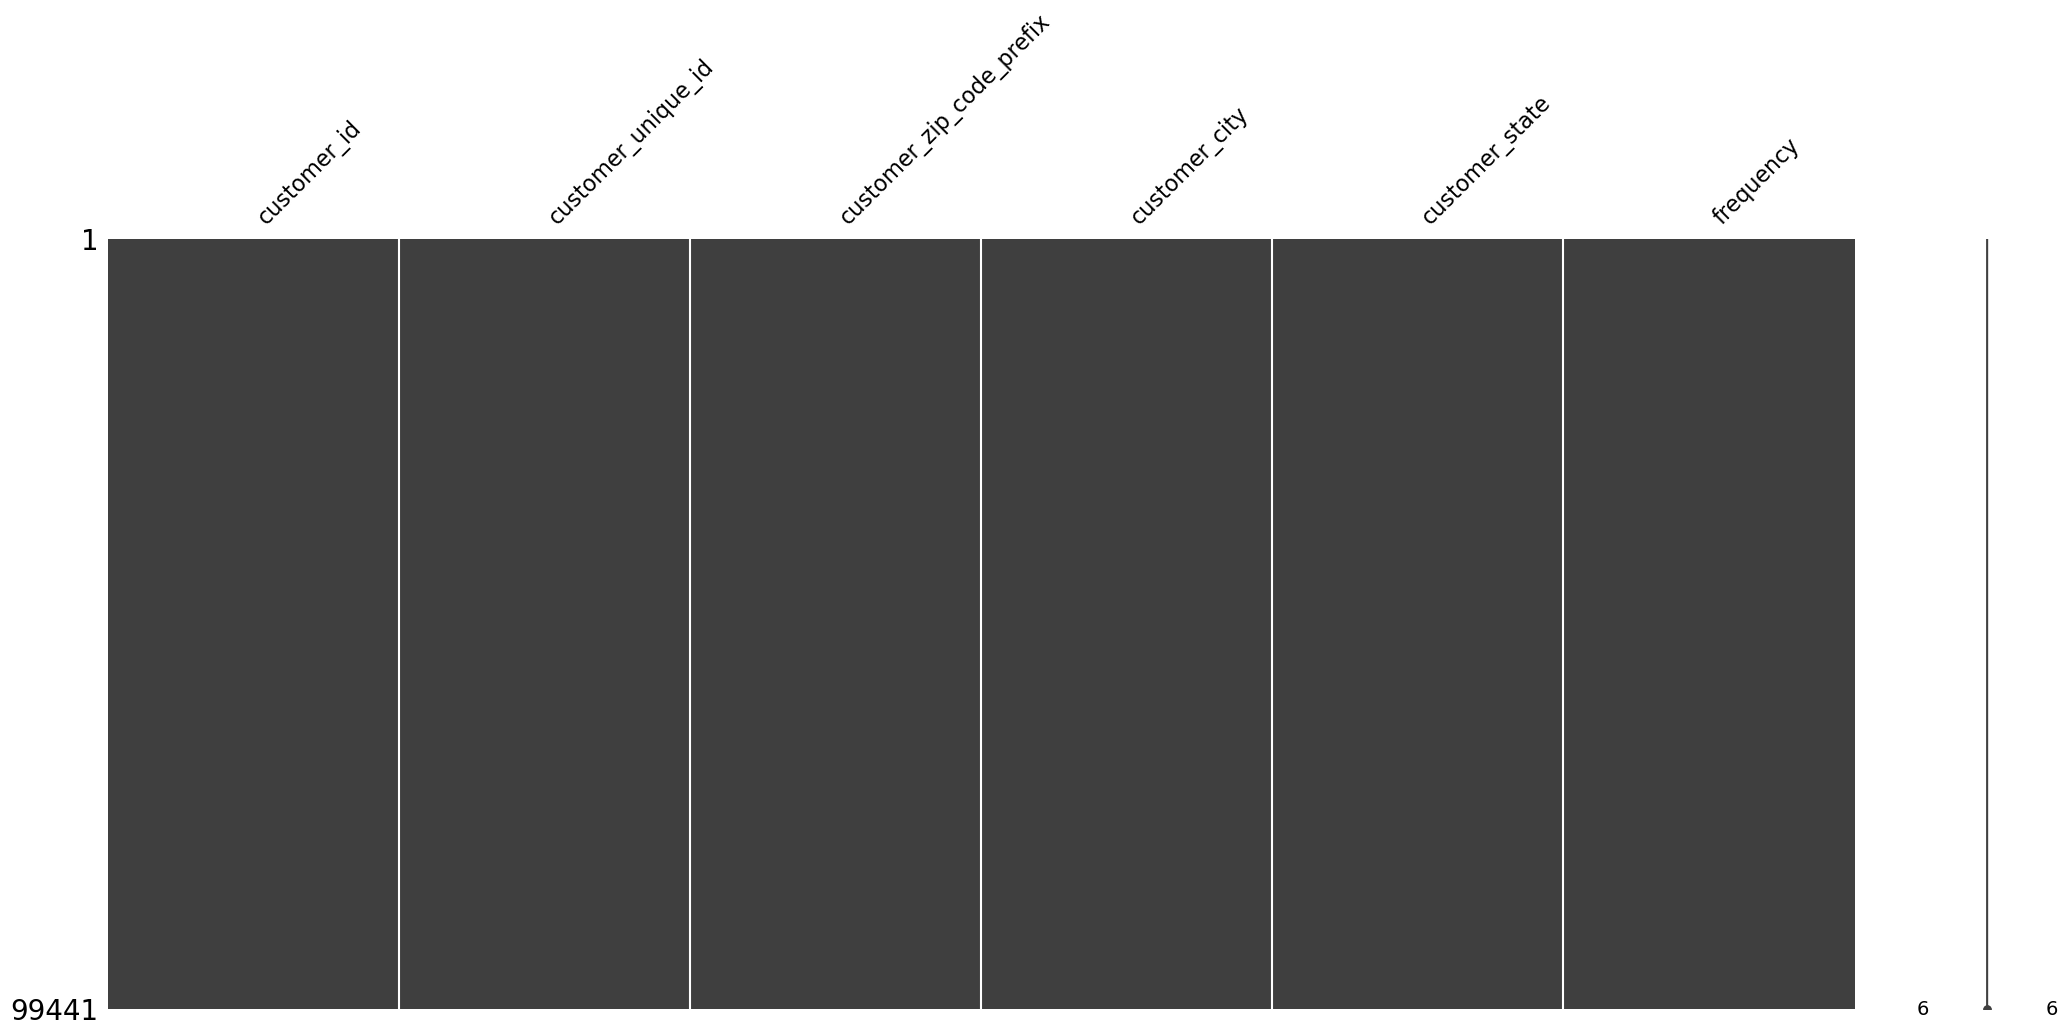

In [145]:
msno.matrix(df_customer)

In [146]:
columns_to_drop = [ "customer_city"]
df_customer = df_customer.drop(columns = columns_to_drop)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,frequency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP,1


In [147]:
missing_values_count = df_customer.isnull().sum()
missing_values_count

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_state              0
frequency                   0
dtype: int64

In [148]:
df_customer.shape

(99441, 5)

In [149]:
df_customer["customer_id"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: customer_id, Length: 99441, dtype: bool

In [150]:
# report = sv.analyze(df_customer)
# report.show_html('report_customer.html')

## Geolocation

In [151]:
df_geolocation = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_geolocation_dataset.csv')

In [152]:
df_geolocation = df_geolocation.drop(columns="geolocation_state")

In [153]:
df_geolocation.shape

(1000163, 4)

In [154]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1037,-23.545621,-46.639292,sao paulo
1,1046,-23.546081,-46.644820,sao paulo
2,1046,-23.546129,-46.642951,sao paulo
3,1041,-23.544392,-46.639499,sao paulo
4,1035,-23.541578,-46.641607,sao paulo


In [155]:
df_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean', 'geolocation_city': 'first'})
df_geolocation = df_geolocation.reset_index()
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1001,-23.550190,-46.634024,sao paulo
1,1002,-23.548146,-46.634979,sao paulo
2,1003,-23.548994,-46.635731,sao paulo
3,1004,-23.549799,-46.634757,sao paulo
4,1005,-23.549456,-46.636733,sao paulo
...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua
19011,99965,-28.183372,-52.039850,agua santa
19012,99970,-28.343766,-51.874689,ciriaco
19013,99980,-28.389129,-51.843836,david canabarro


<AxesSubplot:>

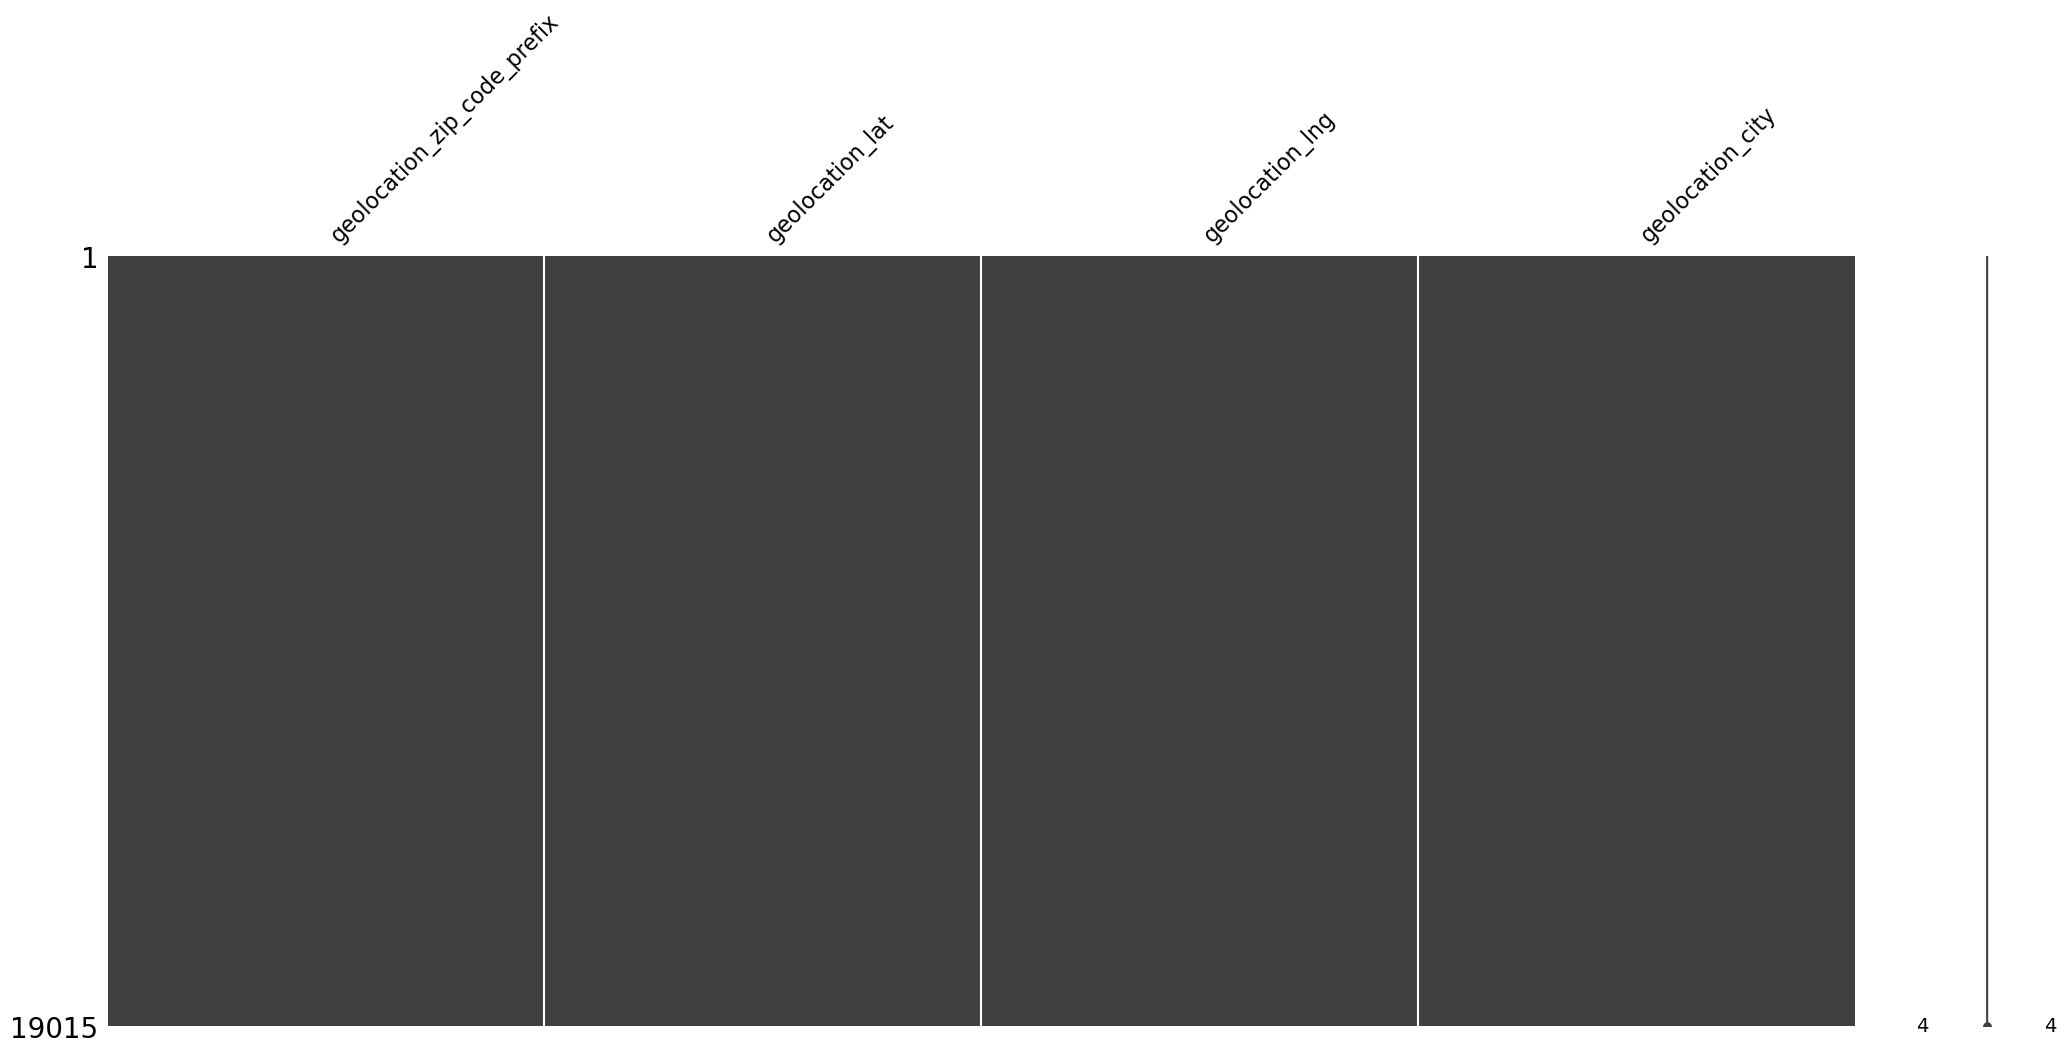

In [156]:
msno.matrix(df_geolocation)


## merge entre customer et geolocation

In [157]:
df_merged = pd.merge(df_customer, df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
# customers_dataset_merged_with_geo = df_customer.merge(geolocation_dataset_without_duplicates_in_zip[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
#                                      left_on='customer_zip_code_prefix', 
#                                      right_on='geolocation_zip_code_prefix', 
#                                      how='left')


In [158]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_state               99441 non-null  object 
 4   frequency                    99441 non-null  int64  
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
 8   geolocation_city             99163 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [159]:
df_merged.shape

(99441, 9)

In [160]:
missing_values_count = df_merged.isnull().sum()
missing_values_count

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_state                   0
frequency                        0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
dtype: int64

In [161]:
df_merged = df_merged.dropna()

In [162]:
# import folium


# # Créer une carte en utilisant les coordonnées comme centre de la carte
# map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)

# # Pour chaque ligne dans le DataFrame, ajouter un marqueur à la carte
# for index, row in df_merged.iterrows():
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(index)).add_to(map)

# # Afficher la carte
# map.save("map.html")


In [163]:
# import json 

# with open('brazil_geo.json') as f:
#    geo= json.load(f)

In [164]:
# import folium

# # Charger le fichier geojson pour le Brésil
# geojson_file = 'brazil_geo.json'

# # Créer la carte
# m = folium.Map(location=[-15.7797, -47.9297], zoom_start=4)

# # Ajouter les limites des états
# folium.GeoJson(
#     geojson_file,
#     name='geojson'
# ).add_to(m)


# # Ajouter un marqueur pour chaque client
# for index, row in df_merged.iterrows():
#     folium.Marker(
#         location=[row['state'],
#         popup=row['client_unique_id']]
#     ).add_to(m)

# # Afficher la carte
# m


In [165]:
# import folium
# from folium.plugins import MarkerCluster


# def add_marker(row):
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(row.name)).add_to(marker_cluster)

# # Créer une carte en utilisant les coordonnées comme centre de la carte
# # map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)
# map = folium.Map(geo_data = geo)

# # Créer un cluster de marqueurs
# marker_cluster = MarkerCluster().add_to(map)
# folium.TileLayer('stamentoner').add_to(map) # Sets Tile Theme to (Dark Theme)
# # folium.Choropleth(geo_data = geo).add_to(map)

# # Ajouter des marqueurs au cluster en utilisant apply
# df_merged.apply(add_marker, axis=1)

# # Afficher la carte
# map.save("map2.html")


In [166]:
# # Stamen Terrain
# map = folium.Map(location=[23.54562128115268, -46.63929204800168 ], tiles="Stamen Terrain", zoom_start=9)
# map

## order items

In [167]:
df_order_items= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_items_dataset.csv')

In [168]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [169]:
df_order_items["order_item_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [170]:
df_order_items = df_order_items.drop(columns = "shipping_limit_date")
df_order_items

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


<AxesSubplot:>

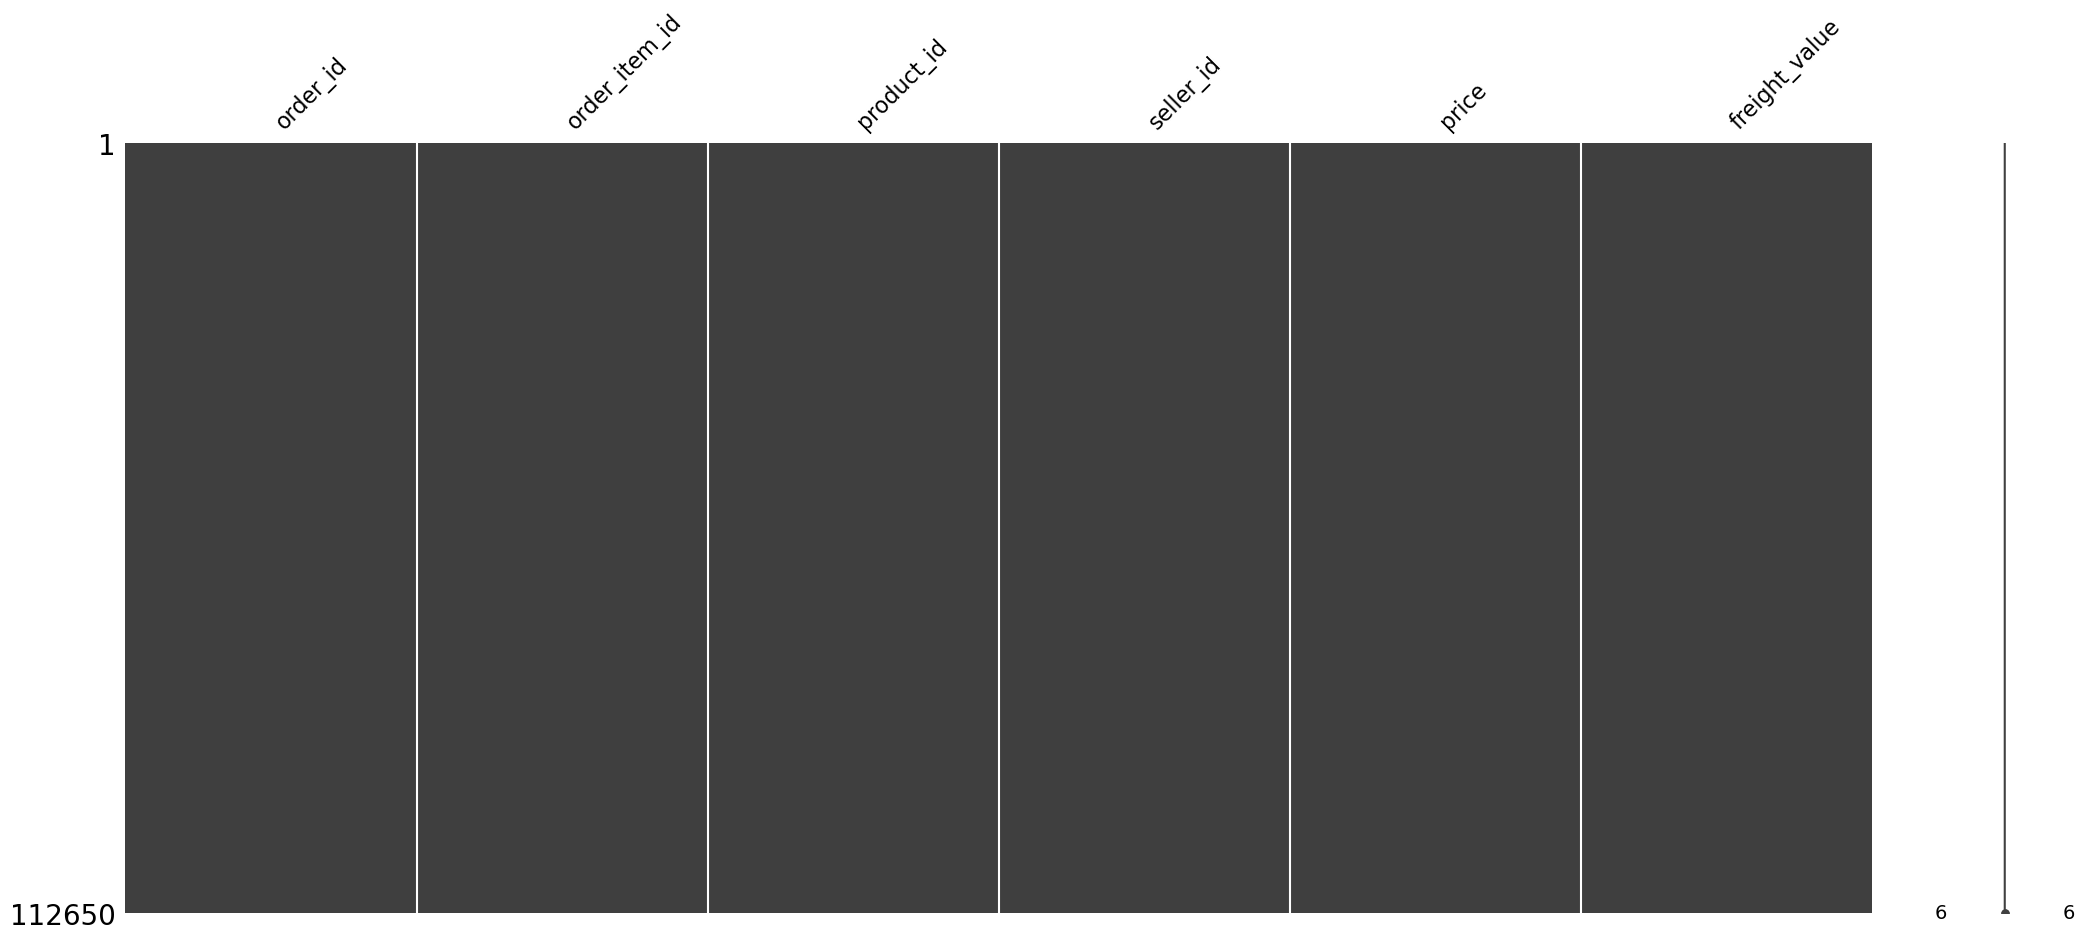

In [171]:
msno.matrix(df_order_items)


In [172]:
# report = sv.analyze(df_order_items)
# report.show_html('report_order_items.html')

## order payements

In [173]:
df_order_payements= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_payments_dataset.csv')

In [174]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [175]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [176]:
# report = sv.analyze(df_order_payements)
# report.show_html('report_order_payements.html')

<AxesSubplot:>

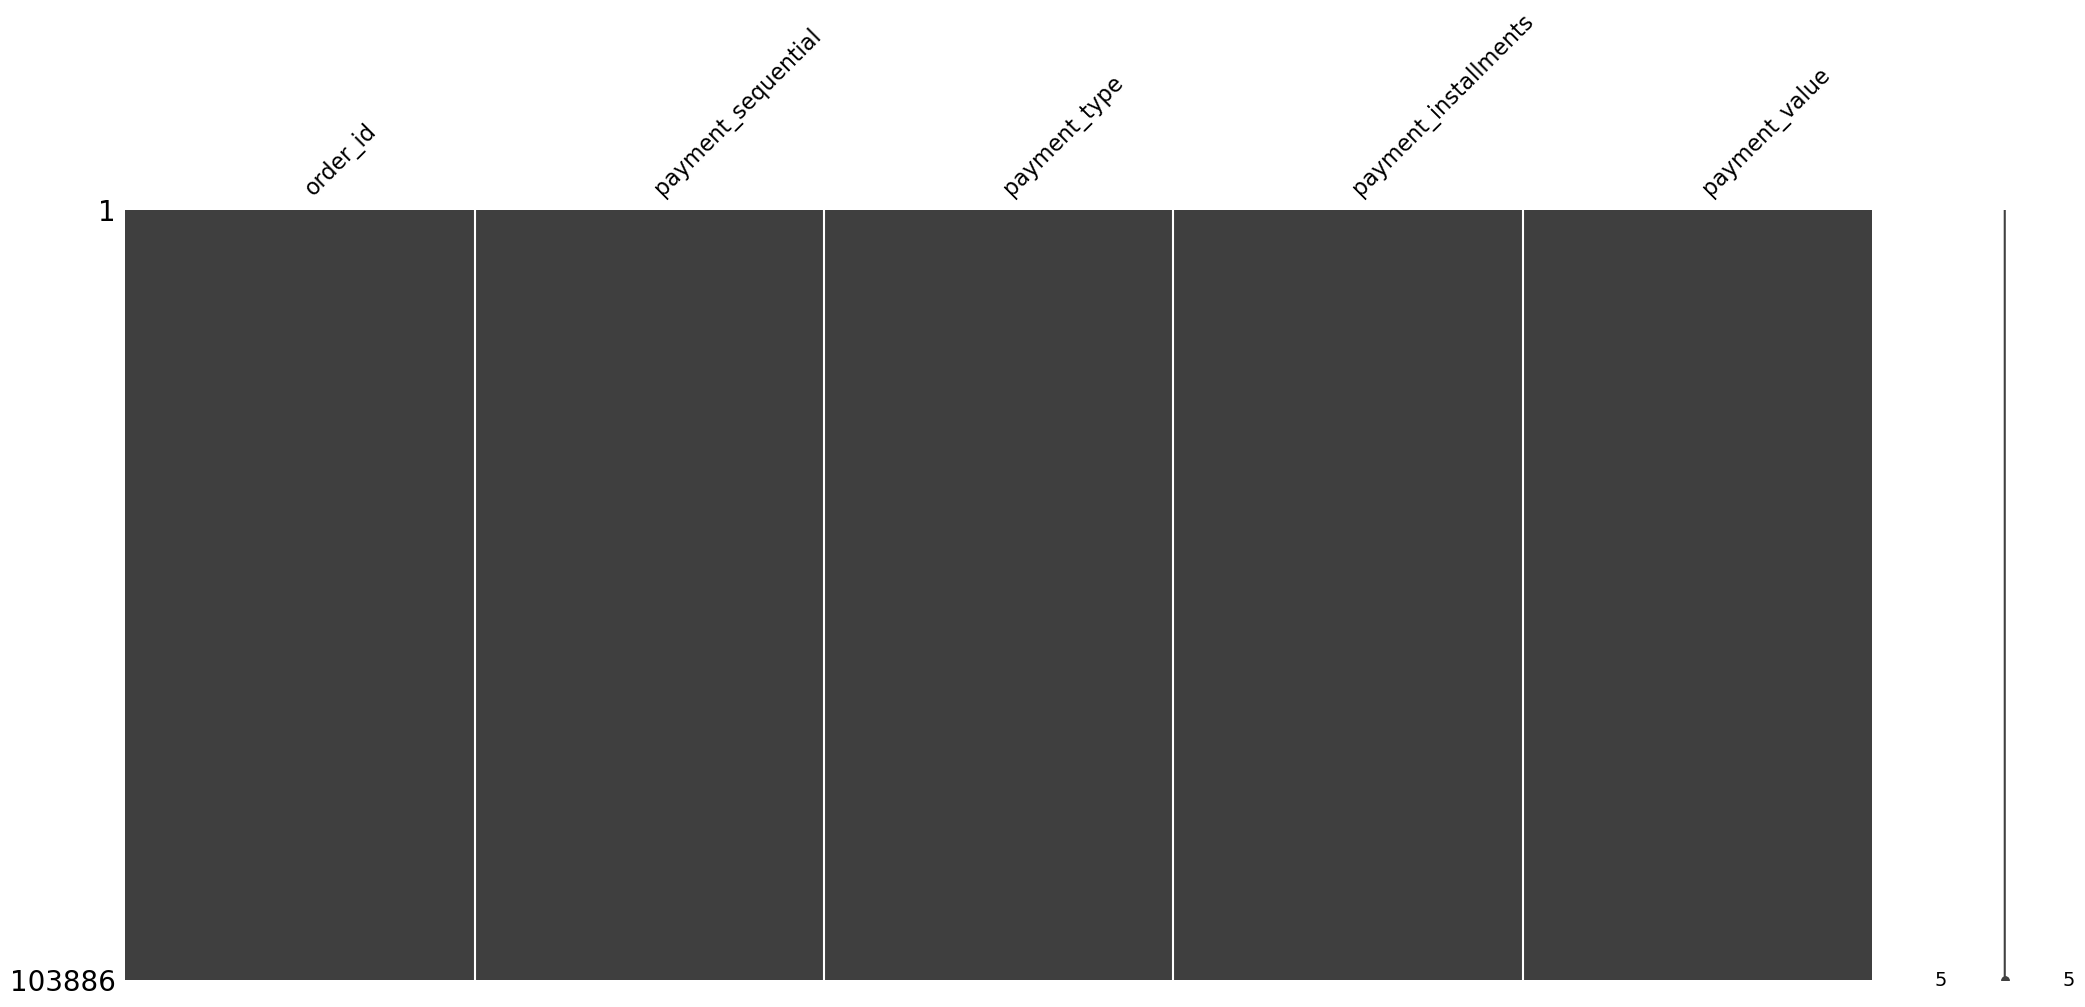

In [177]:
msno.matrix(df_order_payements)


## order reviews 

In [178]:
df_order_reviews= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<AxesSubplot:>

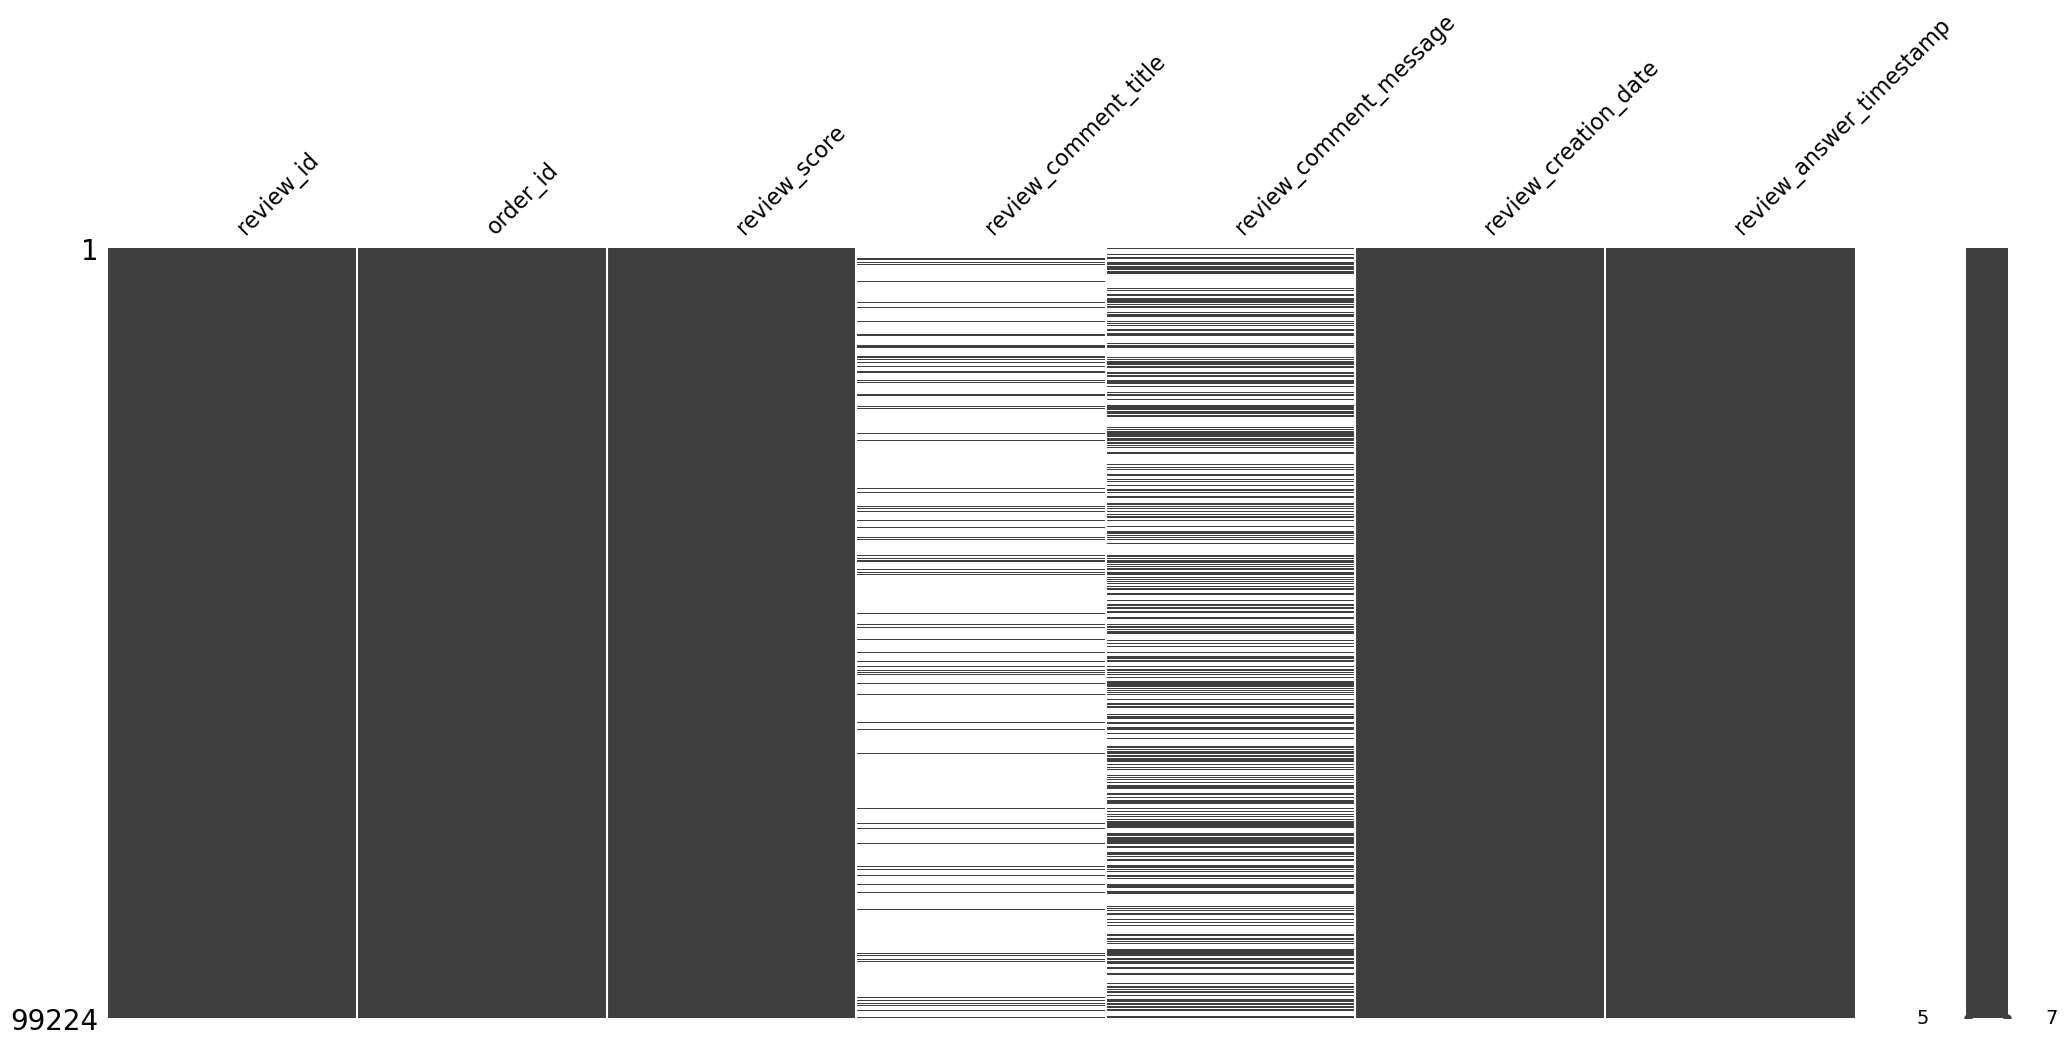

In [179]:
msno.matrix(df_order_reviews)

In [180]:
columstodrop = ["review_comment_title","review_comment_message", "review_creation_date"]
df_order_reviews.drop(columns=columstodrop,  inplace=True)


In [181]:
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"]).dt.strftime('%Y-%m-%d')

In [182]:
df_order_reviews.head()

,review_id,order_id,review_score,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-02


## orders 

In [183]:
df_order= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_orders_dataset.csv')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [184]:
columns_to_drop= ['order_approved_at',"order_delivered_carrier_date"]
df_order = df_order.drop(columns= columns_to_drop)

In [185]:
df_order.shape

(99441, 6)

<AxesSubplot:>

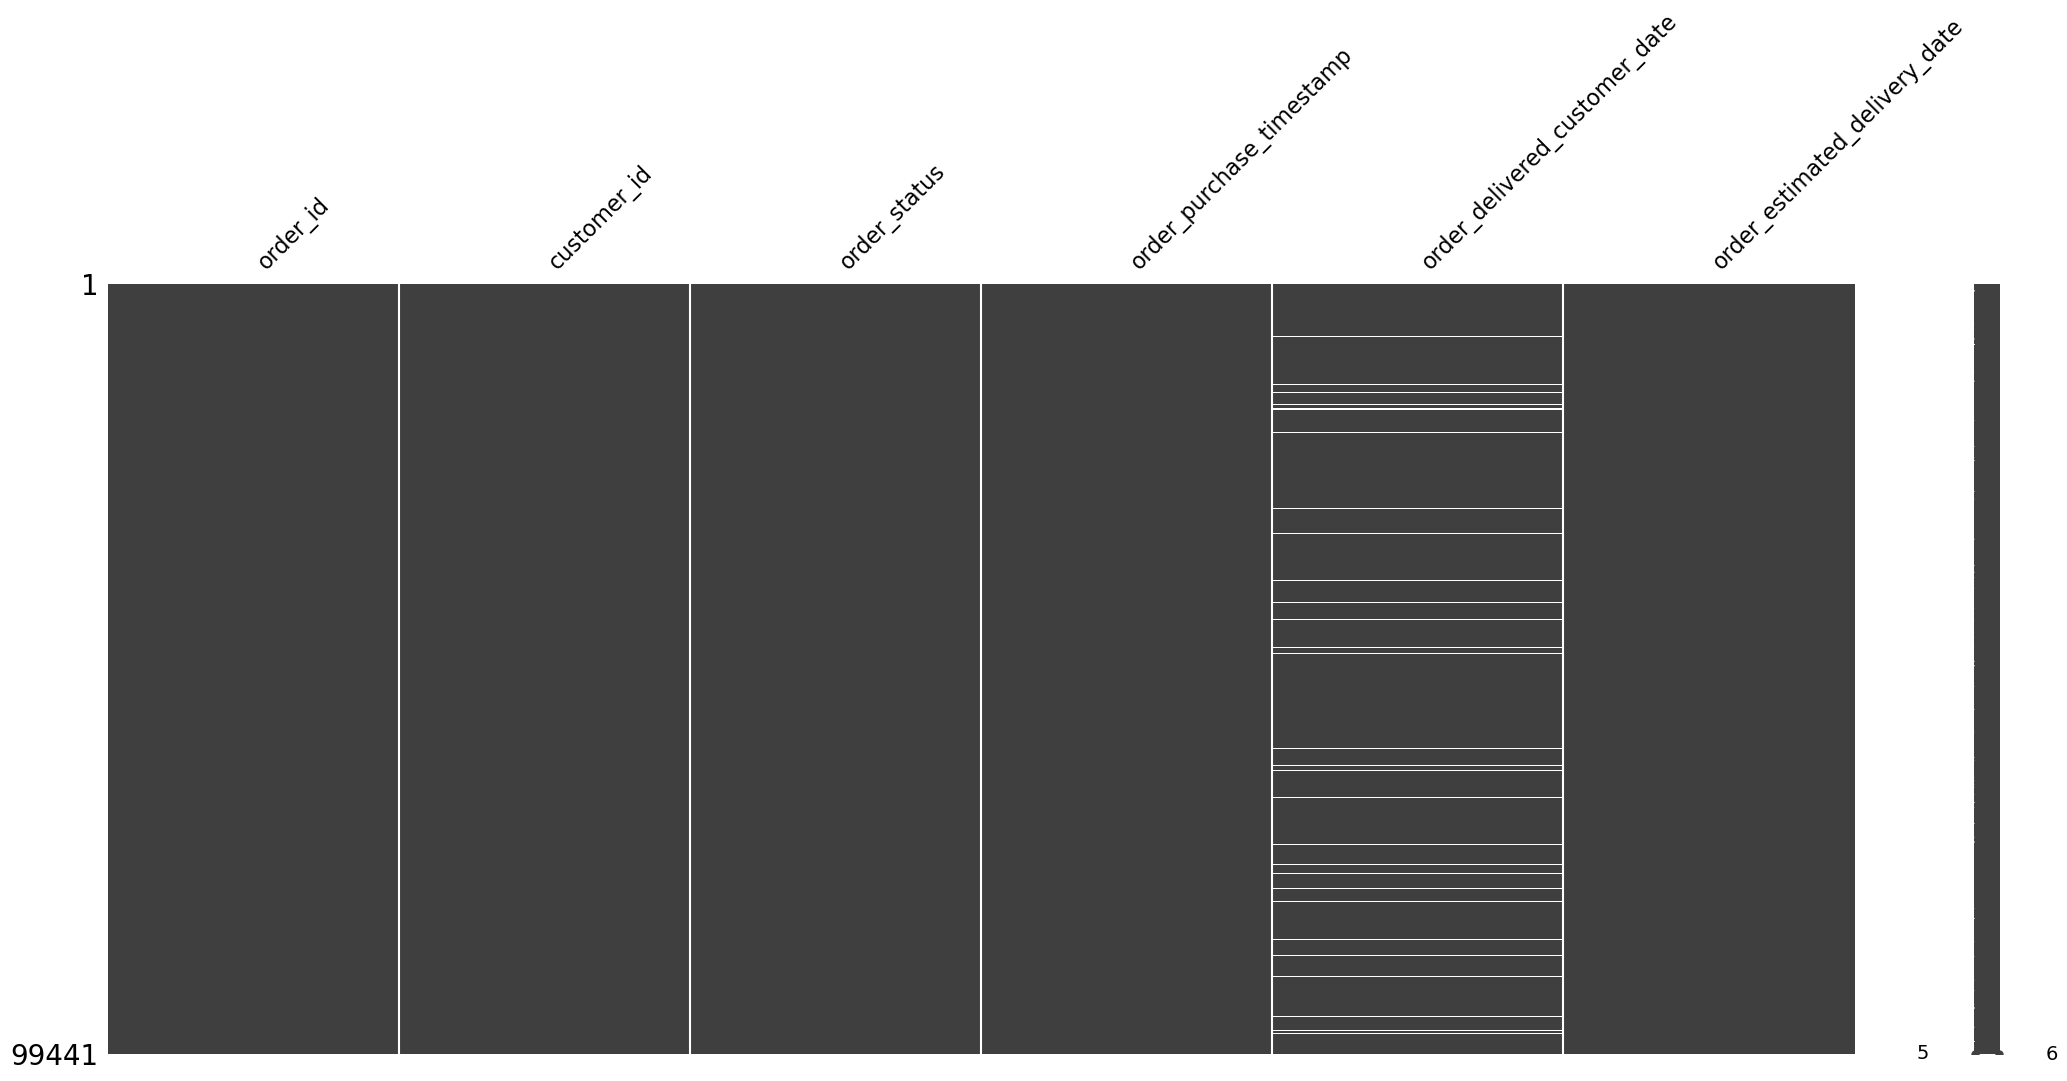

In [186]:
msno.matrix(df_order)


In [187]:
df_order["order_status"].unique

<bound method Series.unique of 0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
99436    delivered
99437    delivered
99438    delivered
99439    delivered
99440    delivered
Name: order_status, Length: 99441, dtype: object>

In [188]:
missing_values_count = df_order.isnull().sum()
missing_values_count

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Products 

In [189]:
df_order_products= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_products_dataset.csv')
df_order_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [190]:
df_order_products = df_order_products[["product_id","product_category_name",]]
df_order_products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [191]:
df_order_products["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

<AxesSubplot:>

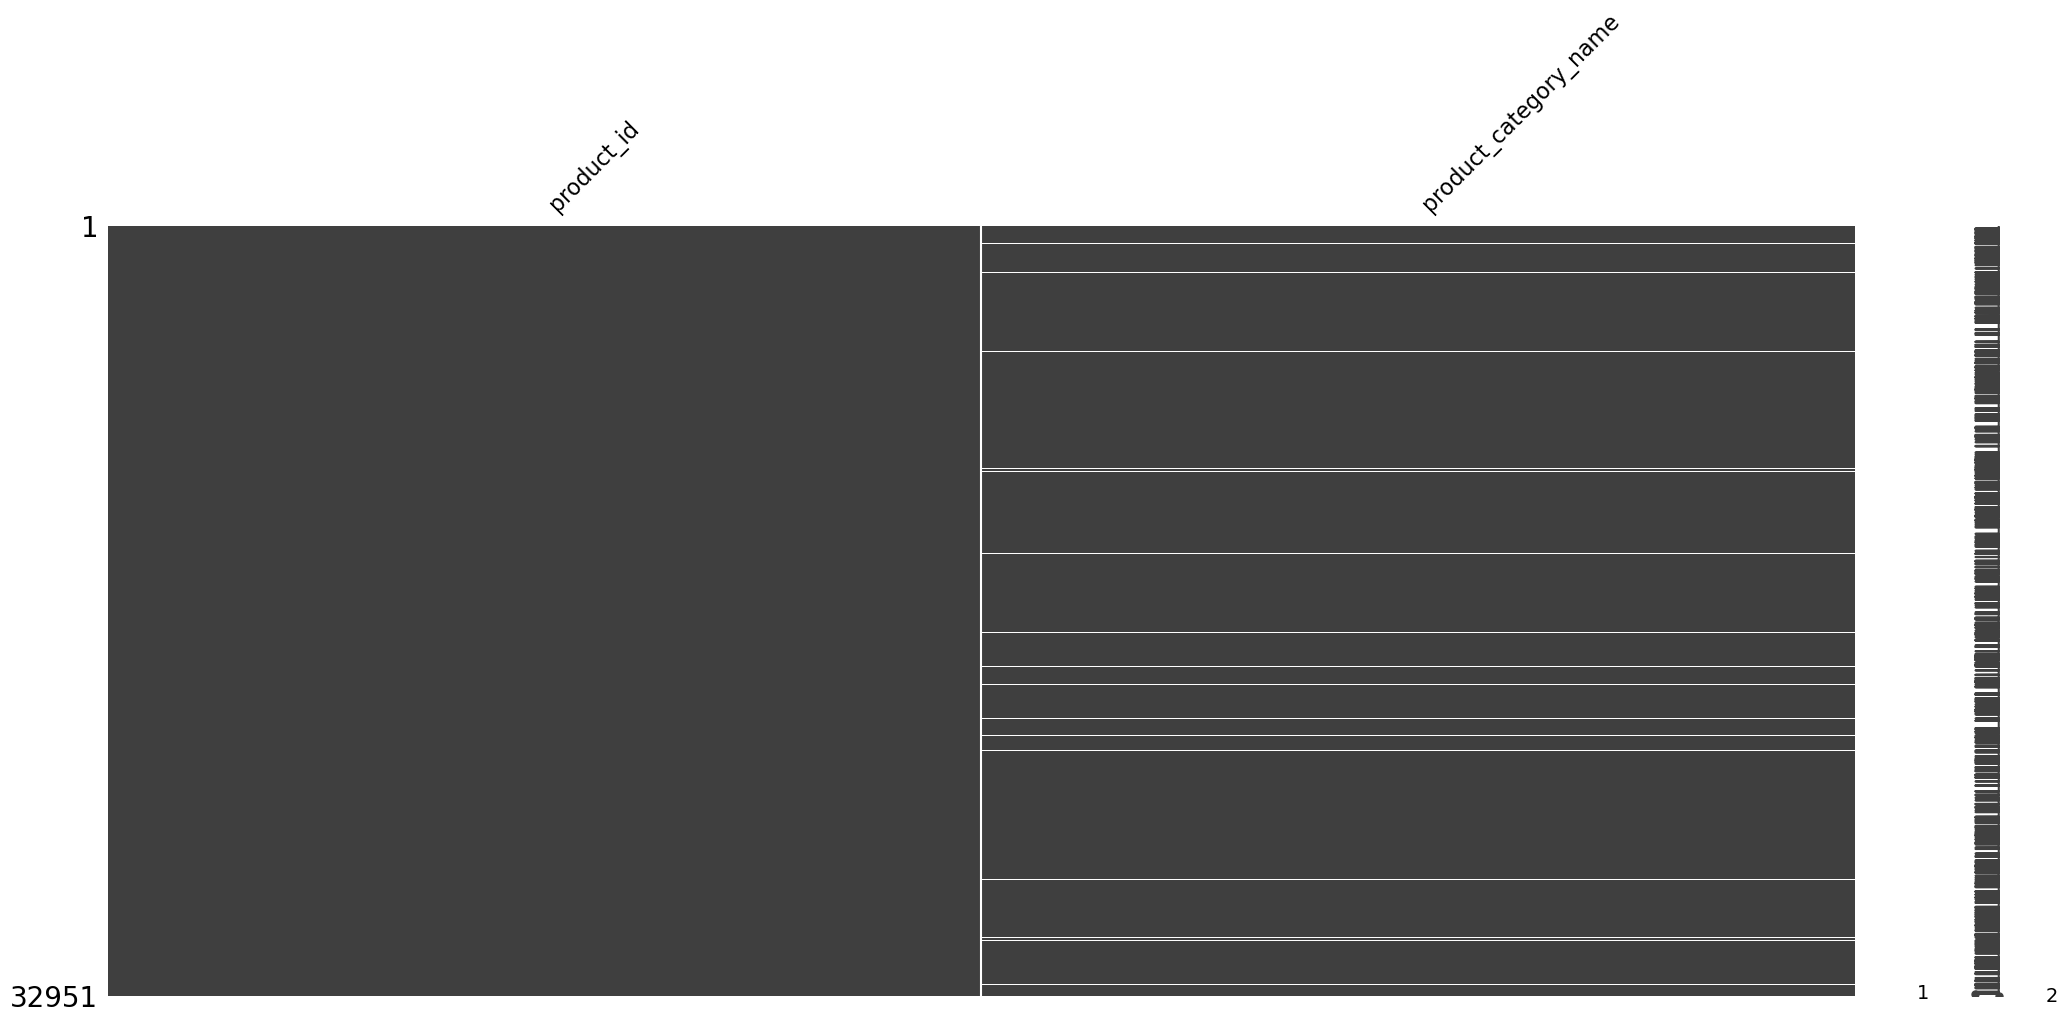

In [192]:
msno.matrix(df_order_products)

In [193]:
missing_values_count = df_order_products.isnull().sum()
missing_values_count

product_id                 0
product_category_name    610
dtype: int64

## Sellers


In [194]:
df_sellers= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_sellers_dataset.csv')

In [195]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [196]:
df_sellers.drop(columns=["seller_city","seller_state"])

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


<AxesSubplot:>

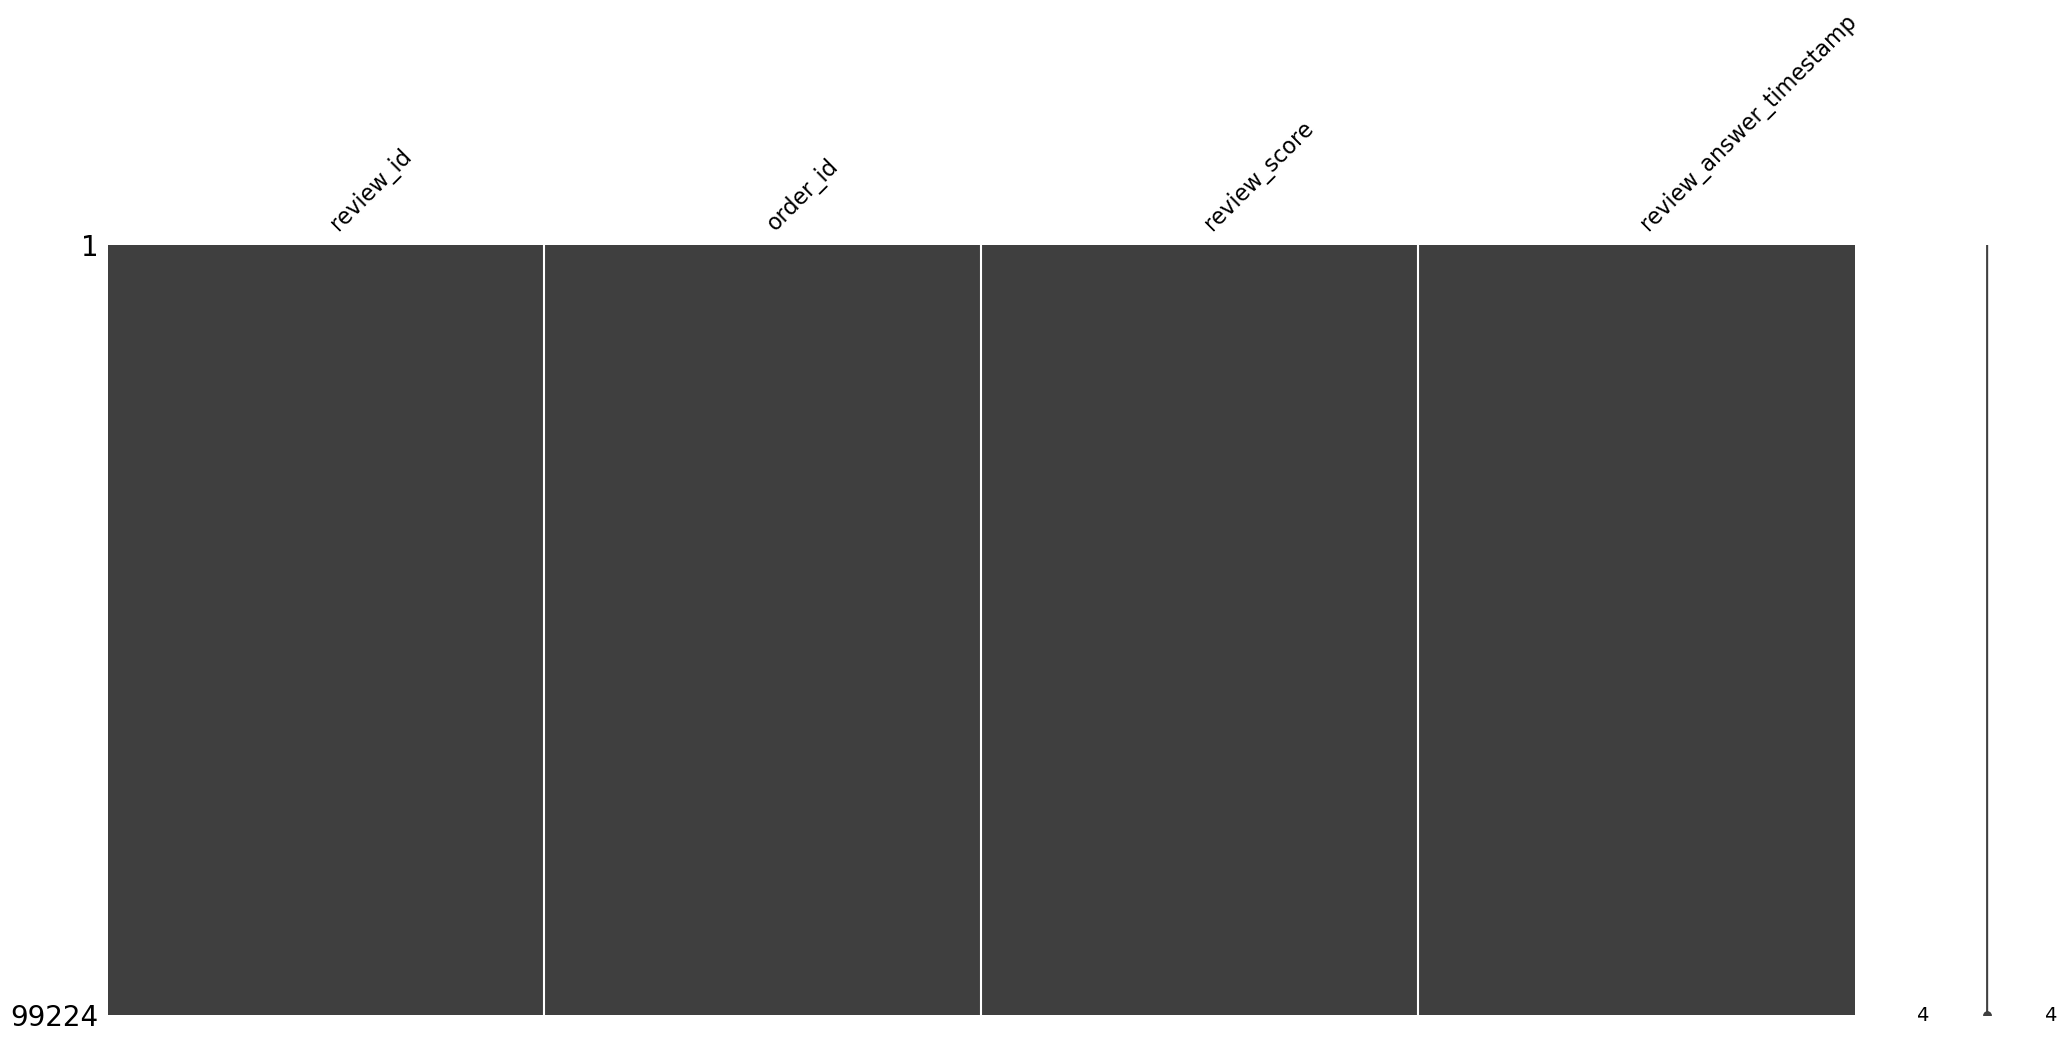

In [197]:
msno.matrix(df_order_reviews)

# Création du data Frame principale

## Category name translation

In [198]:
df_product_category_name_translation= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/product_category_name_translation.csv')

In [199]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<AxesSubplot:>

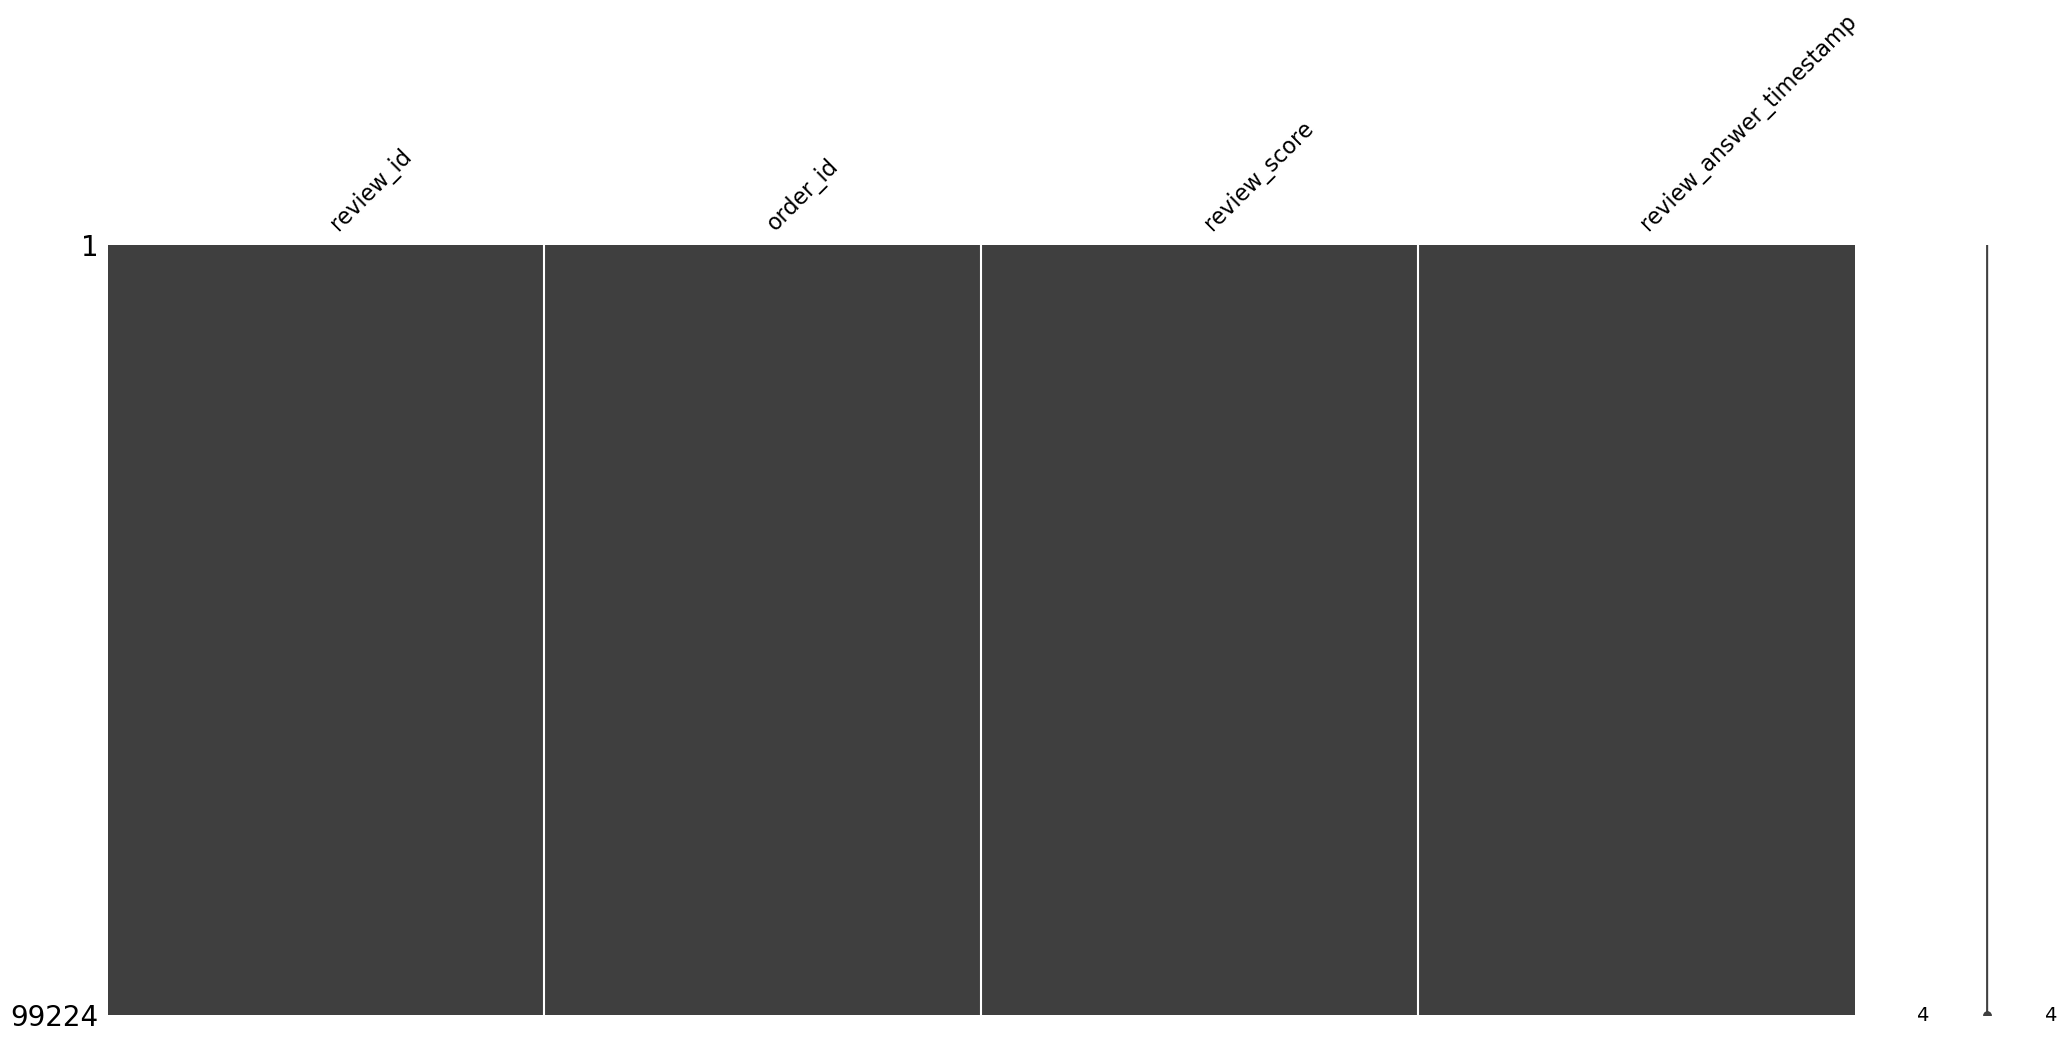

In [200]:
msno.matrix(df_order_reviews)

## Remplacement des produits par catégories en anglais

In [201]:
# Joindre les deux tableaux de données
df_order_products = pd.merge(df_order_products, df_product_category_name_translation, on='product_category_name')

# Remplacer les valeurs dans la colonne 'product_category_name'
df_order_products['product_category_name'] = df_order_products['product_category_name_english']

# Supprimer la colonne inutile
df_order_products.drop('product_category_name_english', axis=1, inplace=True)

print(df_order_products)

                             product_id              product_category_name
0      1e9e8ef04dbcff4541ed26657ea517e5                          perfumery
1      6a2fb4dd53d2cdb88e0432f1284a004c                          perfumery
2      0d009643171aee696f4733340bc2fdd0                          perfumery
3      b1eae565a61935e0011ee7682fef9dc9                          perfumery
4      8da90b37f0fb171b4877c124f965b1f6                          perfumery
...                                 ...                                ...
32323  13b25797ad1e6d6c7cd3cbeb35f8ee7a  furniture_mattress_and_upholstery
32324  dc36a7859b743d8610a2bbbaea26ece9  furniture_mattress_and_upholstery
32325  107fde0930956120d1e13dd1062fbb46  furniture_mattress_and_upholstery
32326  726b4e18f00255e2e63491bcba3f60b8  furniture_mattress_and_upholstery
32327  1dceebcc5f23c02ea23e16d5bedca000                  cds_dvds_musicals

[32328 rows x 2 columns]


## Merger les Dataframes entre eux

### Merge entre customer et order


In [202]:
df_merged_final = pd.merge(df_customer, df_order, left_on='customer_id', right_on='customer_id', how='left')

In [203]:
df_merged_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,frequency,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,1,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP,1,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP,1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,SP,1,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP,1,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00


In [204]:
df_merged_final.shape

(99441, 10)

<AxesSubplot:>

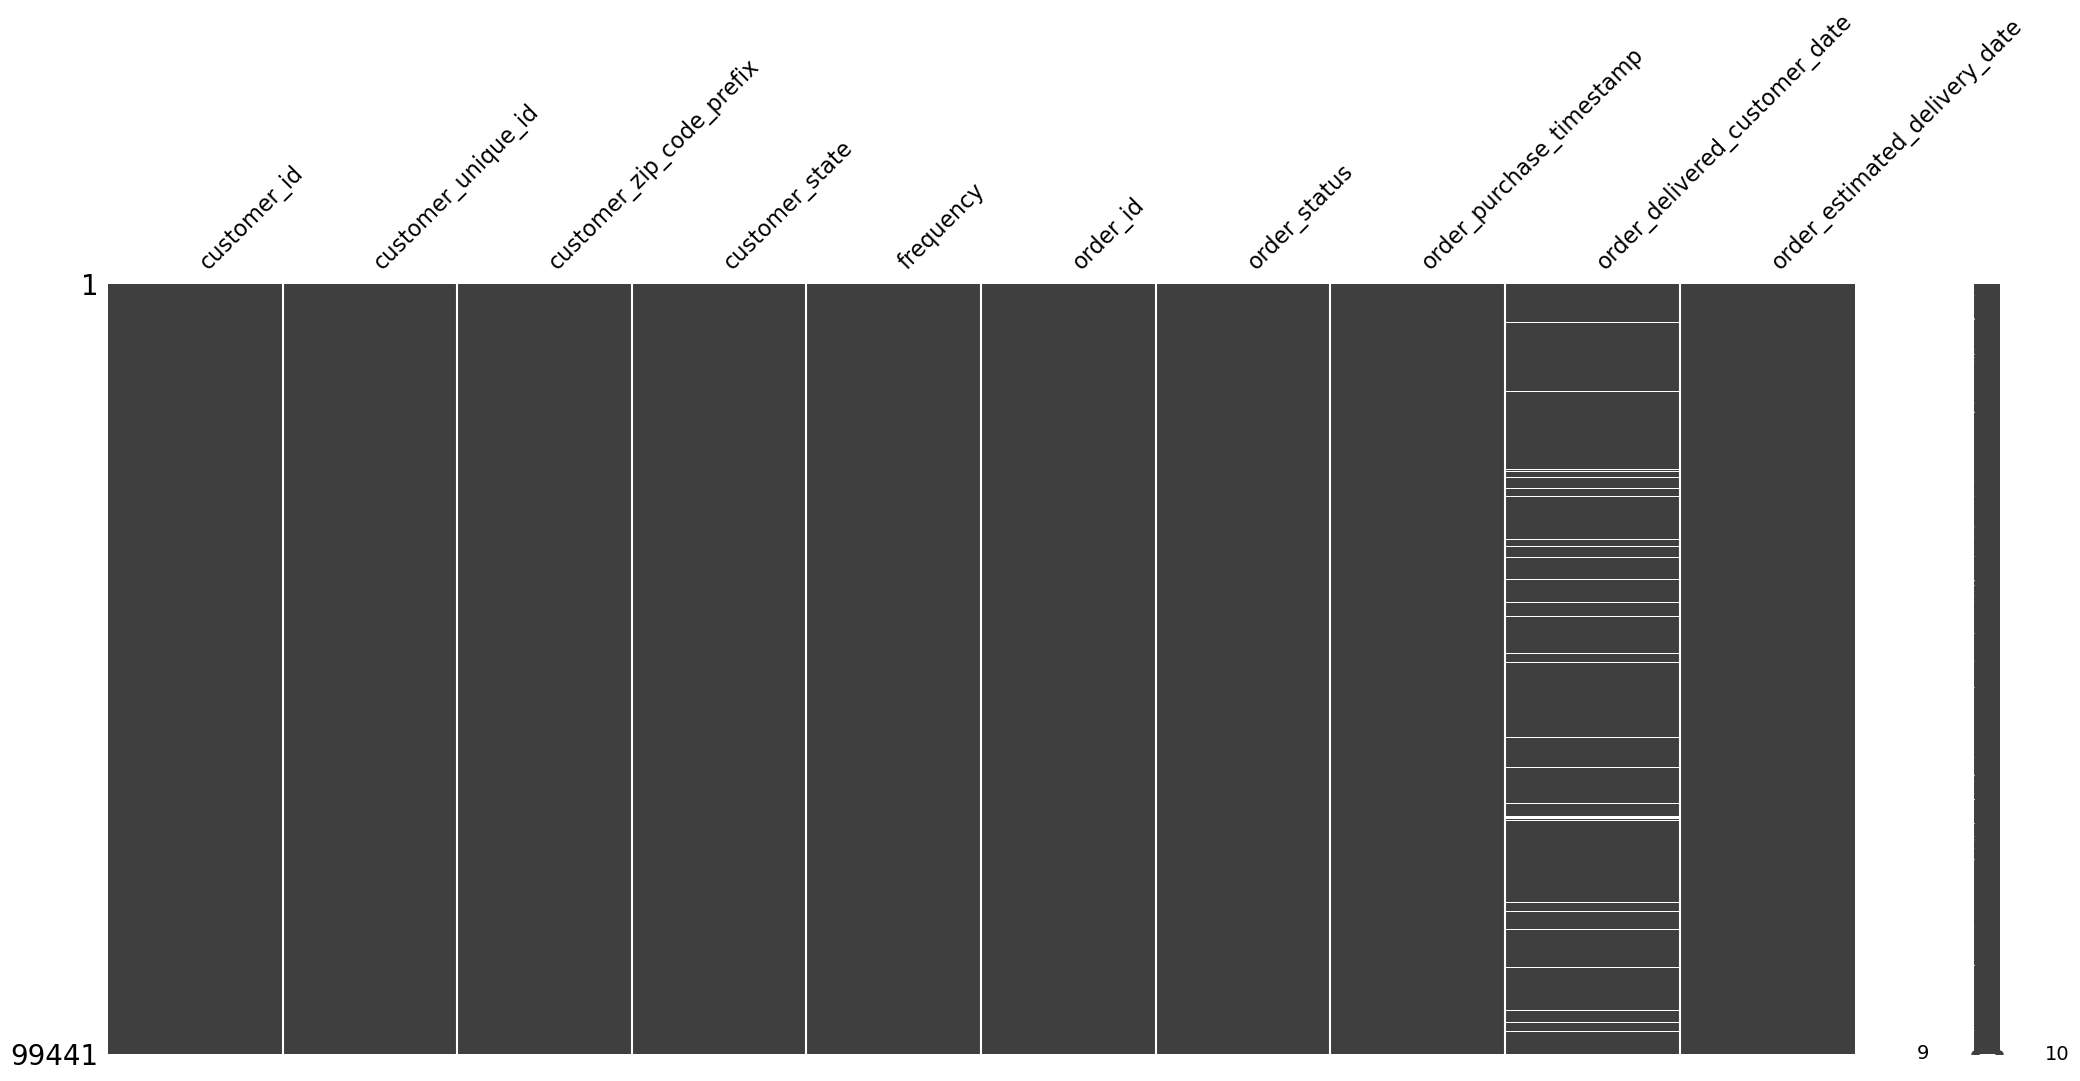

In [205]:
msno.matrix(df_merged_final)

### merge order payements

In [206]:
df_merged_final = pd.merge(df_merged_final, df_order_payements, how='left', on='order_id')

In [207]:
df_merged_final.shape

(103887, 14)

<AxesSubplot:>

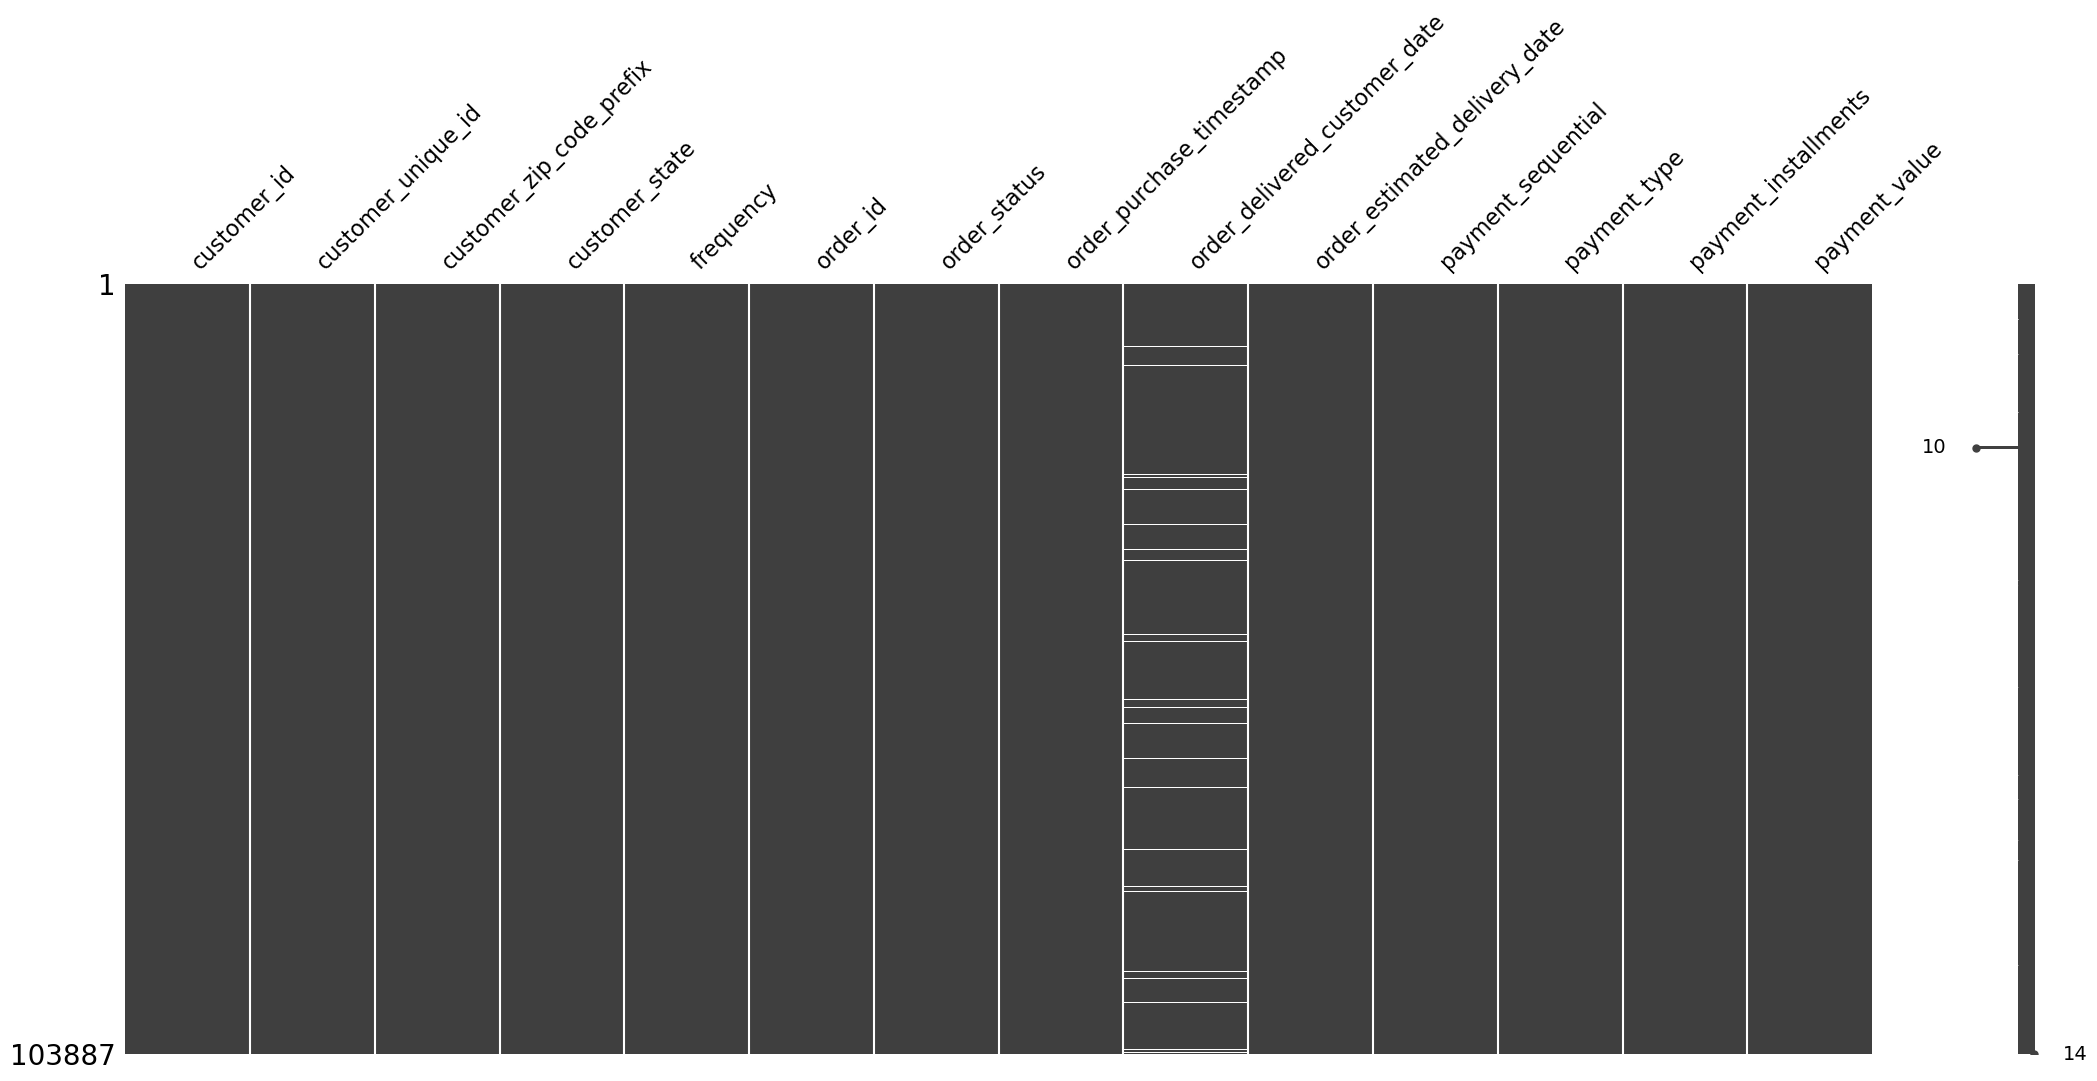

In [208]:
msno.matrix(df_merged_final)

### order items

In [209]:
df_merged_final = pd.merge(df_merged_final, df_order_items, left_on='order_id', right_on='order_id', how='left')

In [210]:
df_merged_final.shape

(118434, 19)

<AxesSubplot:>

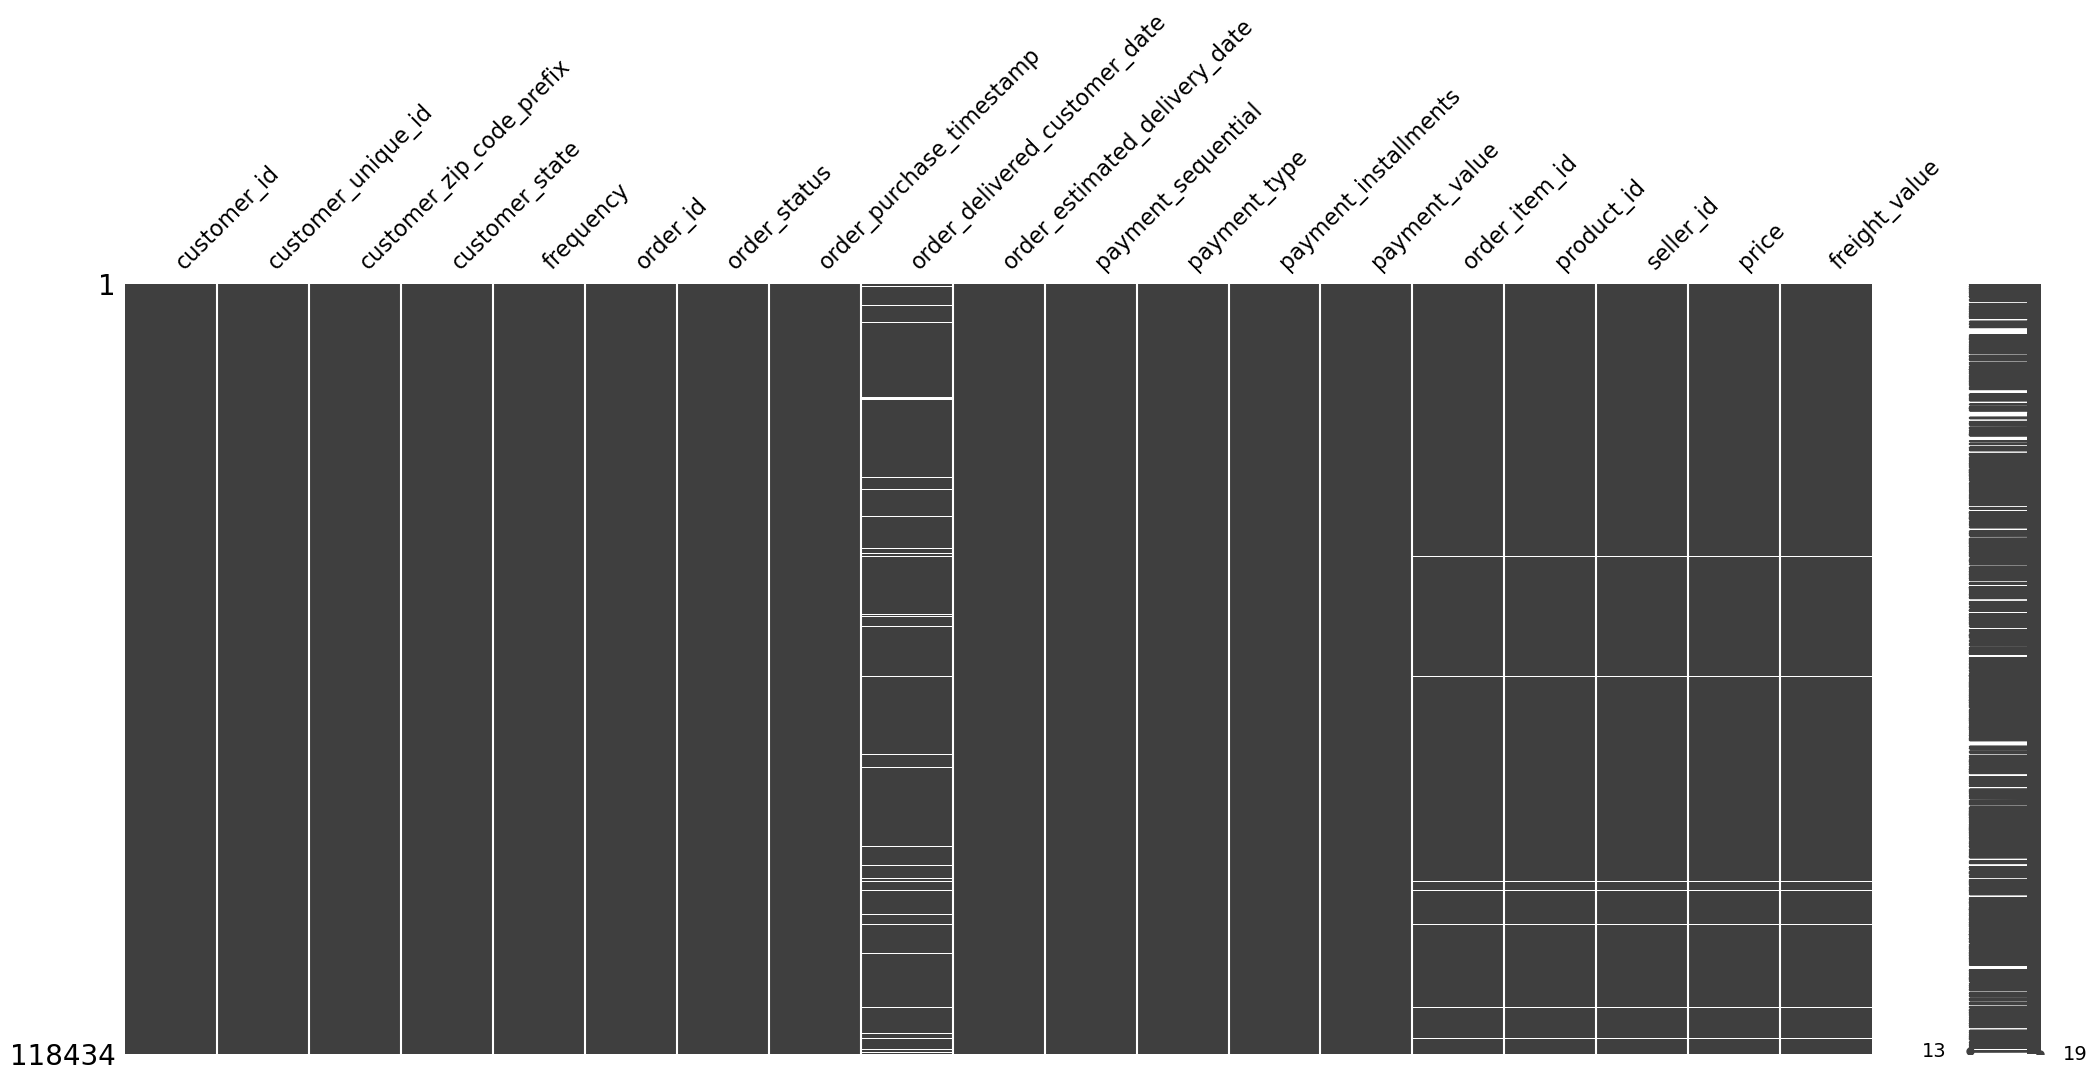

In [211]:
msno.matrix(df_merged_final)

### order id

In [212]:
df_merged_final = pd.merge(df_merged_final, df_order_reviews, left_on='order_id', right_on='order_id', how='left')

In [213]:
df_merged_final.shape

(119143, 22)

<AxesSubplot:>

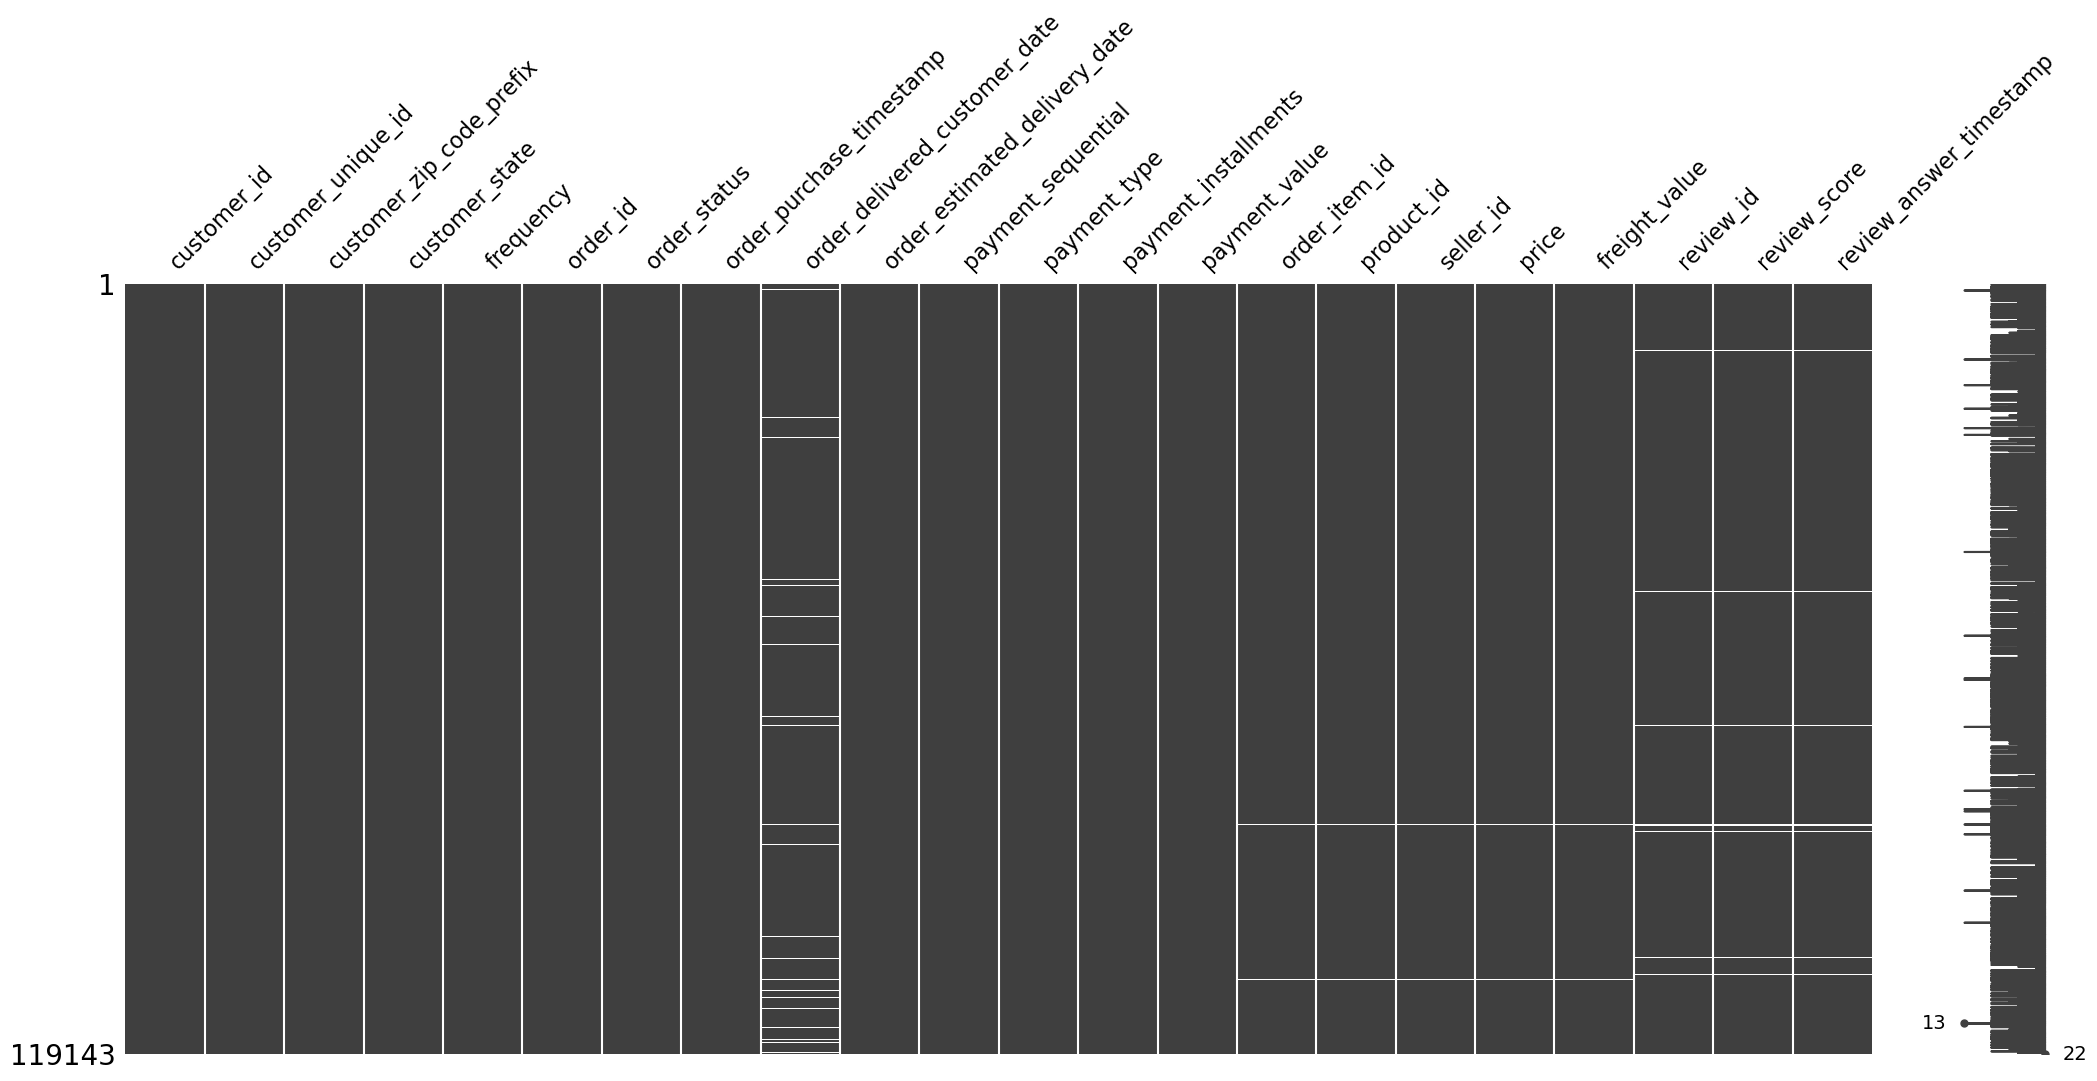

In [214]:
msno.matrix(df_merged_final)

### merge order products

In [215]:
df_merged_final = pd.merge(df_merged_final, df_order_products, left_on='product_id', right_on='product_id', how='left')

In [216]:
df_merged_final.shape

(119143, 23)

<AxesSubplot:>

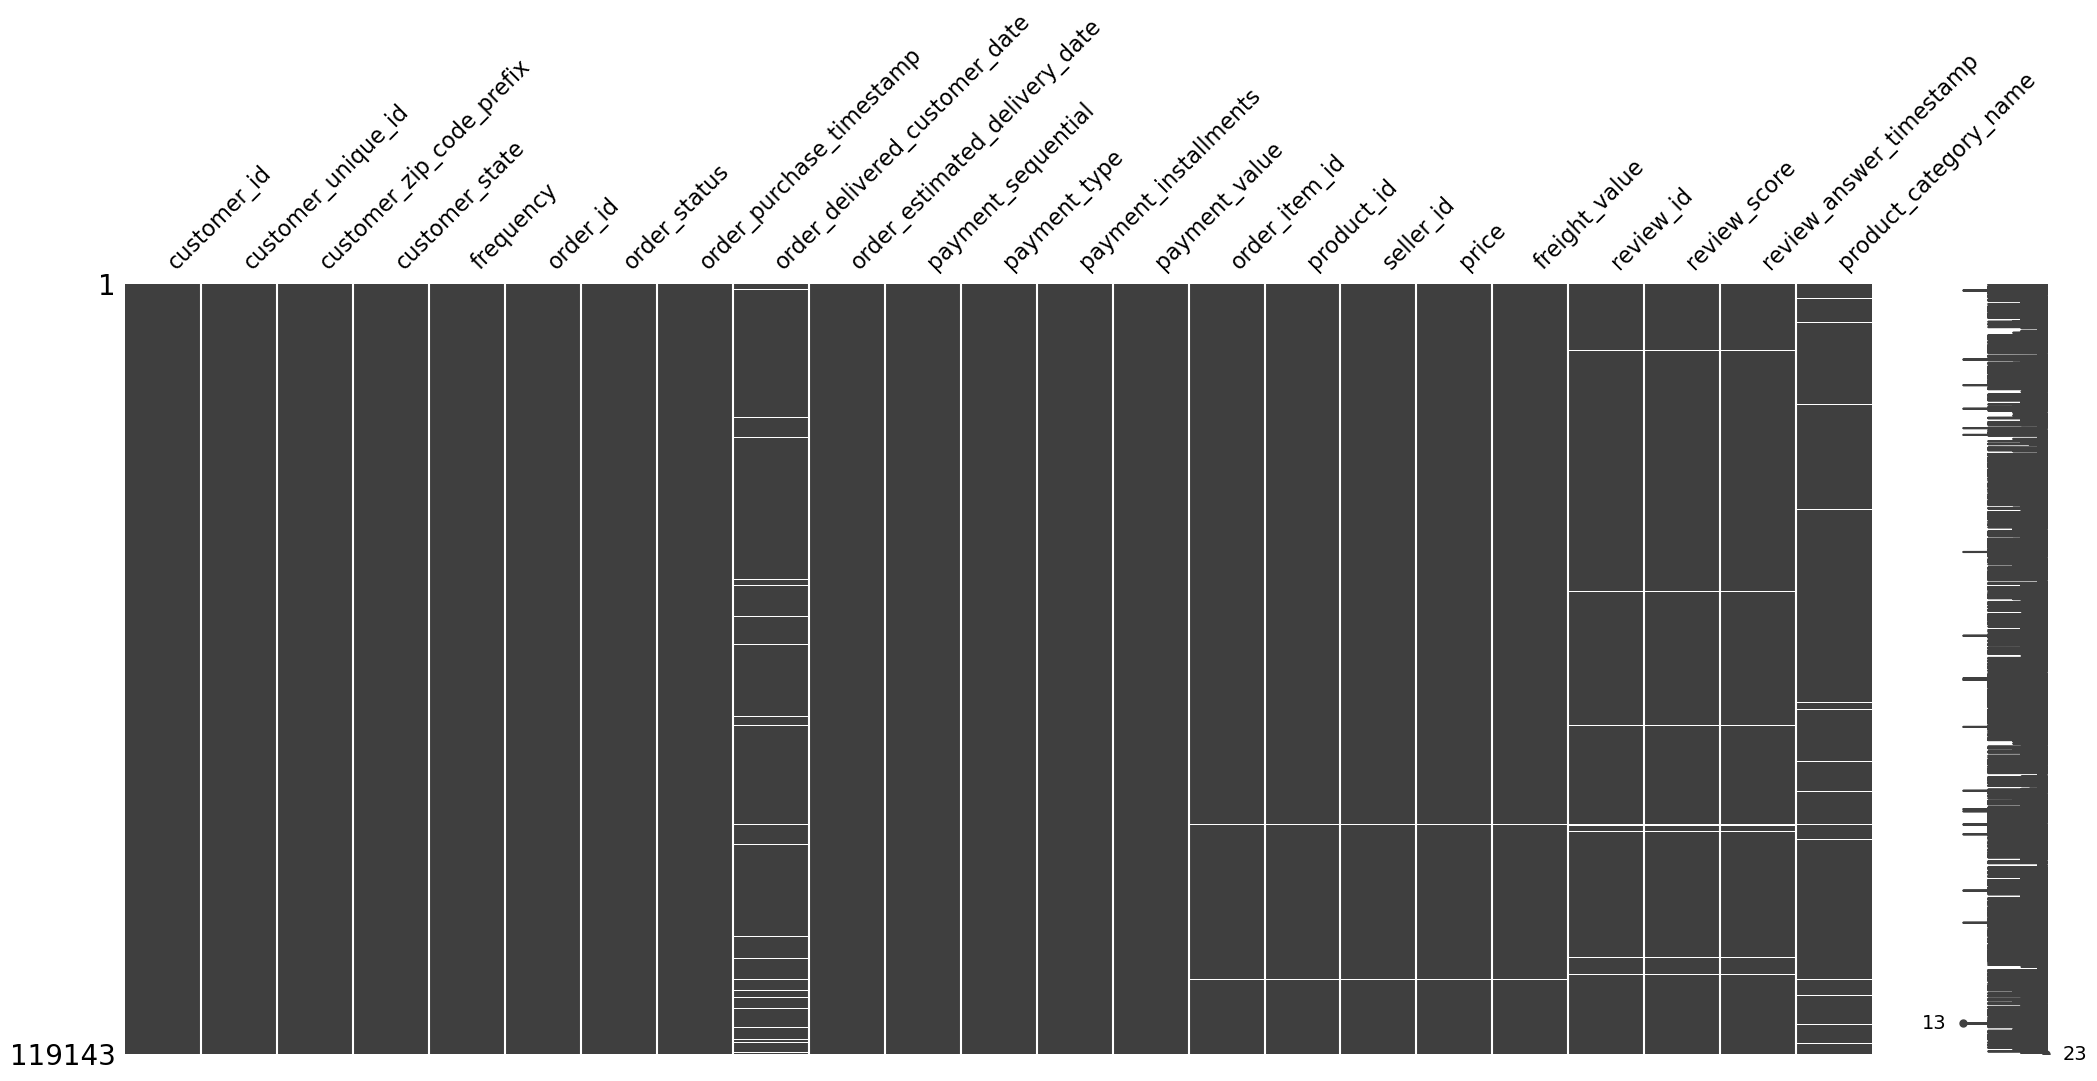

In [217]:
msno.matrix(df_merged_final)

In [218]:
df_merged_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_state', 'frequency', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'review_id', 'review_score',
       'review_answer_timestamp', 'product_category_name'],
      dtype='object')

### merge seller id

In [219]:
df_merged_final = pd.merge(df_merged_final, df_sellers, left_on='seller_id', right_on='seller_id', how='left')

In [220]:
df_merged_final.shape

(119143, 26)

<AxesSubplot:>

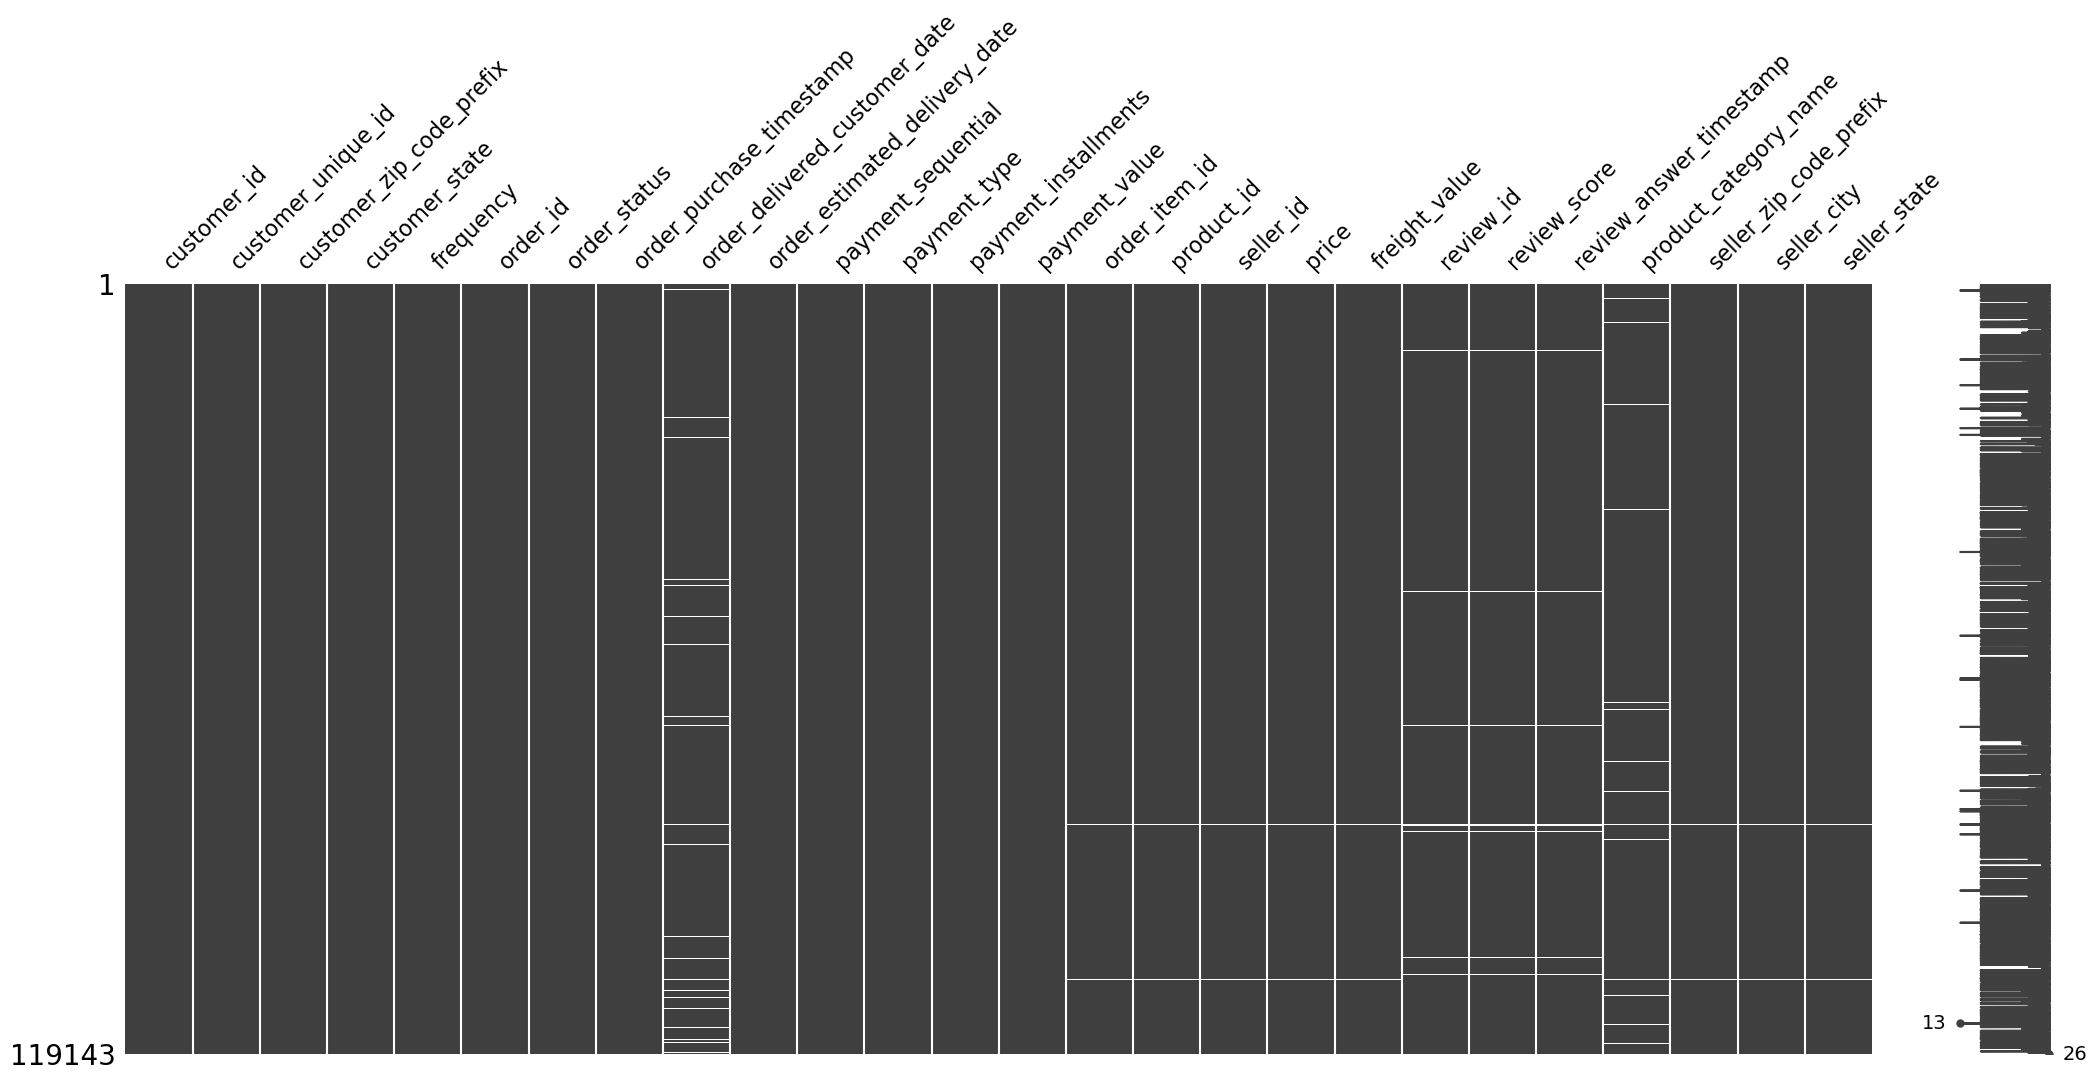

In [221]:
msno.matrix(df_merged_final)

In [222]:
df_merged_final["order_status"].value_counts()


delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

### Nettoyage du data frame final

In [223]:
columns_to_drop = ['customer_id',"review_id",'seller_city',"seller_id","order_id",'order_item_id','product_id','seller_zip_code_prefix',	'customer_zip_code_prefix']
df_merged_final = df_merged_final.drop(columns=columns_to_drop)

In [224]:
df_merged_final["product_category_name"].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

### création de nouvelles colonnes 

In [225]:
# # Create the mapping dictionary
mapping = {
    'fashion_shoes': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_underwear_beach': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'home_construction': 'home',
    'home_appliances_2': 'home',
    'home_confort': 'home',
    'tablets_printing_image': 'home',
    'home_comfort_2': 'home',
    'furniture_bedroom': 'home',
    'furniture_mattress_and_upholstery': 'home',
    'furniture_decor': 'home',
    'kitchen_dining_laundry_garden_furniture': 'home',
    'home_appliances': 'home',
    'luggage_accessories': 'home',
    'housewares': 'home',
    'home_furnishing': 'home',
    'electronics': 'electronics',
    'computers_accessories': 'electronics',
    'telephony': 'electronics',
    'computers': 'electronics',
    'fixed_telephony': 'electronics',
    'consoles_games': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'personal_appliances': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'baby',
    'toys': 'baby',
    'construction_tools_safety': 'tools',
    'costruction_tools_tools': 'tools',
    'construction_tools_lights': 'tools',
    'costruction_tools_garden': 'tools',
    'industry_commerce_and_business': 'tools',
    'sports_leisure': 'sports_outdoors',
    'books_general_interest': 'books',
    'books_technical': 'books',
    'books_imported': 'books',
    'drinks': 'food_drink',
    'food_drink': 'food_drink',
    'food': 'food_drink',
    'christmas_supplies': 'food_drink',
    'party_supplies': 'food_drink',
    'stationery': 'office',
    'pet_shop': 'pet_supplies',
    'musical_instruments': 'musical_instruments',
    'music': 'musical_instruments',
    'cds_dvds_musicals': 'musical_instruments',
    'dvds_blu_ray': 'movies_tv_shows',
    'cine_photo': 'movies_tv_shows',
    'auto': 'auto',
    'agro_industry_and_commerce': 'industry',
    'construction_tools': 'home_improvement',
    'art': 'other',
    'cool_stuff': 'other',
    'garden_tools': 'other',
    'office_furniture': 'other',
    'signaling_and_security': 'other',
    'air_conditioning': 'other',
    'security_and_services': 'other',
    'flowers': 'other',
    'arts_and_craftmanship': 'other'
}


# Use the mapping dictionary to group similar categories
df_merged_final['product_category_name'] = df_merged_final['product_category_name'].map(mapping)

# Fill in any remaining NaN values with 'other'
df_merged_final['product_category_name'].fillna('other', inplace=True)

# View the unique categories
print(df_merged_final['product_category_name'].unique())


['other' 'home' 'sports_outdoors' 'electronics' 'baby' 'auto'
 'health_beauty' 'pet_supplies' 'office' 'tools' 'food_drink' 'fashion'
 'books' 'musical_instruments' 'movies_tv_shows' 'industry']


In [226]:
df_merged_final.shape

(119143, 17)

In [227]:
# report = sv.analyze(df_merged_final)
# report.show_html('report_final.html')

In [228]:
df_merged_final.columns

Index(['customer_unique_id', 'customer_state', 'frequency', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'price', 'freight_value',
       'review_score', 'review_answer_timestamp', 'product_category_name',
       'seller_state'],
      dtype='object')

In [229]:
df_merged_final.head()

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,124.99,21.88,4.0,2017-05-30,other,SP
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,289.00,46.48,5.0,2018-02-10,home,SC
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,139.94,17.79,5.0,2018-06-15,other,SP
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,149.94,23.36,5.0,2018-04-02,other,SP
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,230.00,22.25,5.0,2018-08-17,home,SP


In [230]:
df_merged_final["same_region"] = df_merged_final["customer_state"] == df_merged_final["seller_state"]


In [231]:
df_merged_final

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state,same_region
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,124.99,21.88,4.0,2017-05-30,other,SP,True
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,289.00,46.48,5.0,2018-02-10,home,SC,False
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,139.94,17.79,5.0,2018-06-15,other,SP,True
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,149.94,23.36,5.0,2018-04-02,other,SP,True
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,230.00,22.25,5.0,2018-08-17,home,SP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,credit_card,6.0,88.78,74.90,13.88,4.0,2018-04-28,books,SP,True
119139,d52a67c98be1cf6a5c84435bd38d095d,SP,1,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,credit_card,3.0,129.06,114.90,14.16,5.0,2018-04-16,sports_outdoors,SP,True
119140,e9f50caf99f032f0bf3c55141f019d99,CE,1,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,credit_card,5.0,56.04,37.00,19.04,1.0,2018-05-08,health_beauty,SP,False
119141,73c2643a0a458b49f58cea58833b192e,RS,1,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,credit_card,2.0,711.07,689.00,22.07,5.0,2017-11-19,other,SP,False


In [232]:
df_merged_final['order_purchase_timestamp'] = pd.to_datetime(df_merged_final['order_purchase_timestamp'])
df_merged_final['order_delivered_customer_date'] = pd.to_datetime(df_merged_final['order_delivered_customer_date'])
df_merged_final['order_estimated_delivery_date'] = pd.to_datetime(df_merged_final['order_estimated_delivery_date'])


In [233]:

df_merged_final['delivery_delay'] = (df_merged_final['order_delivered_customer_date'] - df_merged_final['order_estimated_delivery_date']).dt.total_seconds()
df_merged_final['on_time_delivery'] = df_merged_final['delivery_delay'] <= 0
df_merged_final['delivery_time'] = (df_merged_final['order_delivered_customer_date'] - df_merged_final['order_purchase_timestamp']).dt.total_seconds()



In [234]:

df_merged_final['delivery_time'] = round(df_merged_final['delivery_time'] / 86400)
df_merged_final['delivery_delay'] = round(df_merged_final['delivery_delay'] / 86400)



In [235]:
df_merged_final

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state,same_region,delivery_delay,on_time_delivery,delivery_time
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,...,124.99,21.88,4.0,2017-05-30,other,SP,True,-11.0,True,9.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,...,289.00,46.48,5.0,2018-02-10,home,SC,False,-7.0,True,17.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,...,139.94,17.79,5.0,2018-06-15,other,SP,True,2.0,False,26.0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,...,149.94,23.36,5.0,2018-04-02,other,SP,True,-12.0,True,15.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,...,230.00,22.25,5.0,2018-08-17,home,SP,True,-5.0,True,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,...,74.90,13.88,4.0,2018-04-28,books,SP,True,-11.0,True,6.0
119139,d52a67c98be1cf6a5c84435bd38d095d,SP,1,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20,1.0,credit_card,3.0,...,114.90,14.16,5.0,2018-04-16,sports_outdoors,SP,True,-8.0,True,7.0
119140,e9f50caf99f032f0bf3c55141f019d99,CE,1,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02,1.0,credit_card,5.0,...,37.00,19.04,1.0,2018-05-08,health_beauty,SP,False,8.0,False,31.0
119141,73c2643a0a458b49f58cea58833b192e,RS,1,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05,1.0,credit_card,2.0,...,689.00,22.07,5.0,2017-11-19,other,SP,False,-18.0,True,13.0


In [236]:
df_merged_final["order_status"].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

### nettoyage

In [237]:
columns_to_drop = [ "order_delivered_customer_date","order_estimated_delivery_date","review_answer_timestamp","seller_state"]
df_merged_final = df_merged_final.drop(columns = columns_to_drop)

In [238]:
df_merged_final.head()

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87,124.99,21.88,4.0,other,True,-11.0,True,9.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48,289.00,46.48,5.0,home,False,-7.0,True,17.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73,139.94,17.79,5.0,other,True,2.0,False,26.0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30,149.94,23.36,5.0,other,True,-12.0,True,15.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25,230.00,22.25,5.0,home,True,-5.0,True,11.0


In [239]:
df_merged_final["order_purchase_timestamp"] = pd.to_datetime(df_merged_final["order_purchase_timestamp"]).dt.strftime('%Y-%m-%d')

In [240]:
df_merged_final["customer_unique_id"].value_counts()


9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
5e809f39163aadeda694b51606b02d49     1
368ad1cd5eb8e06bb9b4cae407bb4bf2     1
302c1a15f1ada723f22801b30293cde3     1
2880d08cd241936c6ce9a1f916ed30fe     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [241]:
df_merged_final.shape

(119143, 17)

In [242]:


# calculer la fréquence de chaque valeur unique dans la colonne 'col1'
total_object = df_merged_final['customer_unique_id'].value_counts()

# ajouter la fréquence en tant que nouvelle colonne au DataFrame
df_merged_final['total_object'] = df_merged_final['customer_unique_id'].map(total_object)




In [243]:
mask = df_merged_final["customer_unique_id"] == '9a736b248f67d166d2fbb006bcb877c3' 
df_merged_final[mask]


,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time,total_object
22435,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-08-08,17.0,voucher,1.0,16.70,12.99,23.21,5.0,other,False,-15.0,True,6.0,75
22436,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-08-08,17.0,voucher,1.0,16.70,12.99,23.21,5.0,other,False,-15.0,True,6.0,75
22437,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-08-08,17.0,voucher,1.0,16.70,83.80,5.12,5.0,home,False,-15.0,True,6.0,75
22438,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-08-08,1.0,voucher,1.0,2.61,12.99,23.21,5.0,other,False,-15.0,True,6.0,75
22439,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-08-08,1.0,voucher,1.0,2.61,12.99,23.21,5.0,other,False,-15.0,True,6.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93475,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-07-27,3.0,voucher,1.0,8.00,45.20,26.97,5.0,home,True,-14.0,True,5.0,75
93476,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-07-27,5.0,voucher,1.0,8.00,45.20,26.97,5.0,home,True,-14.0,True,5.0,75
93477,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-07-27,4.0,voucher,1.0,8.00,45.20,26.97,5.0,home,True,-14.0,True,5.0,75
93478,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,2017-07-27,12.0,voucher,1.0,2.13,45.20,26.97,5.0,home,True,-14.0,True,5.0,75


In [244]:
from datetime import datetime
max_date = df_merged_final["order_purchase_timestamp"].max()
min_date = df_merged_final["order_purchase_timestamp"].min()


date_format = "%Y-%m-%d"


max_date = datetime.strptime(max_date, date_format)
min_date = datetime.strptime(min_date, date_format)

total_days = (max_date - min_date).days
df_merged_final["order_purchase_timestamp"] = pd.to_datetime(df_merged_final["order_purchase_timestamp"], format=date_format)
df_merged_final["last_purchase"] = (max_date - df_merged_final["order_purchase_timestamp"]).dt.days


In [245]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        119143 non-null  object        
 1   customer_state            119143 non-null  object        
 2   frequency                 119143 non-null  int64         
 3   order_status              119143 non-null  object        
 4   order_purchase_timestamp  119143 non-null  datetime64[ns]
 5   payment_sequential        119140 non-null  float64       
 6   payment_type              119140 non-null  object        
 7   payment_installments      119140 non-null  float64       
 8   payment_value             119140 non-null  float64       
 9   price                     118310 non-null  float64       
 10  freight_value             118310 non-null  float64       
 11  review_score              118146 non-null  float64       
 12  pr

In [246]:
df_merged_final.shape

(119143, 19)

In [247]:
columns_to_drop = ["price","freight_value","delivery_time","delivery_delay"]
df_merged_final= df_merged_final.drop(columns = columns_to_drop)

In [248]:
missing_values_count = df_merged_final.isnull().sum()
missing_values_count

customer_unique_id            0
customer_state                0
frequency                     0
order_status                  0
order_purchase_timestamp      0
payment_sequential            3
payment_type                  3
payment_installments          3
payment_value                 3
review_score                997
product_category_name         0
same_region                   0
on_time_delivery              0
total_object                  0
last_purchase                 0
dtype: int64

In [249]:
df_merged_final.dropna(inplace=True)


In [250]:
df_merged_final.shape

(118143, 15)

## Group by customer unique id

In [251]:
agg_dict = {}

for col in df_merged_final.columns:
    if df_merged_final[col].dtype == 'object' or df_merged_final[col].dtype == 'bool':
        agg_dict[col] = lambda x: x.value_counts().index[0]
    elif df_merged_final[col].dtype == 'float64' or df_merged_final[col].dtype == 'int64' or df_merged_final[col].dtype == 'datetime64[ns]':
        agg_dict[col] = 'mean'

def get_mode(x):
    return x.mode().iloc[0]

agg_dict

{'customer_unique_id': <function __main__.<lambda>(x)>,
 'customer_state': <function __main__.<lambda>(x)>,
 'frequency': 'mean',
 'order_status': <function __main__.<lambda>(x)>,
 'order_purchase_timestamp': 'mean',
 'payment_sequential': 'mean',
 'payment_type': <function __main__.<lambda>(x)>,
 'payment_installments': 'mean',
 'payment_value': 'mean',
 'review_score': 'mean',
 'product_category_name': <function __main__.<lambda>(x)>,
 'same_region': <function __main__.<lambda>(x)>,
 'on_time_delivery': <function __main__.<lambda>(x)>,
 'total_object': 'mean',
 'last_purchase': 'mean'}

In [252]:
agg_dict = {
    'customer_unique_id': get_mode,
 'customer_state': get_mode,
 'frequency': 'max',
 'order_status': get_mode,
 'payment_sequential': 'mean',

 'payment_value': 'mean',
 'payment_type': get_mode,
 'payment_installments': 'mean',
 'review_score': 'mean',
 'product_category_name': get_mode,
 'same_region': get_mode,
 'on_time_delivery': get_mode,
 'total_object': 'sum',
 'last_purchase': 'min'}

In [253]:
grouped_df = df_merged_final.groupby(by='customer_unique_id').agg(agg_dict)

In [254]:
grouped_df.head()

,customer_unique_id,customer_state,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0000366f3b9a7992bf8c76cfdf3221e2,SP,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160
0000b849f77a49e4a4ce2b2a4ca5be3f,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163
0000f46a3911fa3c0805444483337064,0000f46a3911fa3c0805444483337064,SC,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586
0000f6ccb0745a6a4b88665a16c9f078,0000f6ccb0745a6a4b88665a16c9f078,PA,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370
0004aac84e0df4da2b147fca70cf8255,0004aac84e0df4da2b147fca70cf8255,SP,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337


In [255]:
grouped_df["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'RR', 'AP', 'RO'], dtype=object)

In [256]:
grouped_df = grouped_df.drop(columns="customer_state")

In [257]:
grouped_df = grouped_df.drop(columns="customer_unique_id")

In [258]:
df_merged_final.shape

(118143, 15)

In [259]:
grouped_df["order_status"].value_counts()

delivered      92685
shipped          973
canceled         580
unavailable      558
invoiced         297
processing       281
created            3
approved           2
Name: order_status, dtype: int64

In [260]:
missing_values_count = grouped_df.isnull().sum()
missing_values_count

frequency                0
order_status             0
payment_sequential       0
payment_value            0
payment_type             0
payment_installments     0
review_score             0
product_category_name    0
same_region              0
on_time_delivery         0
total_object             0
last_purchase            0
dtype: int64

In [261]:
grouped_df=grouped_df[grouped_df["order_status"]== "delivered"]

In [262]:
grouped_df

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163
0000f46a3911fa3c0805444483337064,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586
0000f6ccb0745a6a4b88665a16c9f078,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370
0004aac84e0df4da2b147fca70cf8255,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,delivered,1.0,2067.42,credit_card,10.0,5.0,health_beauty,False,True,4,496
fffea47cd6d3cc0a88bd621562a9d061,1,delivered,1.0,84.58,credit_card,1.0,4.0,baby,False,True,1,311
ffff371b4d645b6ecea244b27531430a,1,delivered,1.0,112.46,credit_card,1.0,5.0,auto,False,True,1,617


# Modélisation 

In [263]:
grouped_df.head()

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163
0000f46a3911fa3c0805444483337064,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586
0000f6ccb0745a6a4b88665a16c9f078,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370
0004aac84e0df4da2b147fca70cf8255,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337


In [265]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92685 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frequency              92685 non-null  int64  
 1   order_status           92685 non-null  object 
 2   payment_sequential     92685 non-null  float64
 3   payment_value          92685 non-null  float64
 4   payment_type           92685 non-null  object 
 5   payment_installments   92685 non-null  float64
 6   review_score           92685 non-null  float64
 7   product_category_name  92685 non-null  object 
 8   same_region            92685 non-null  bool   
 9   on_time_delivery       92685 non-null  bool   
 10  total_object           92685 non-null  int64  
 11  last_purchase          92685 non-null  int64  
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 8.0+ MB


In [266]:
# grouped_df = grouped_df.drop(columns=["order_status"])

In [267]:
# columns_numeric =  list(grouped_df.select_dtypes(include=['int', 'float']).columns)

In [268]:
# columns_numeric

In [269]:
# grouped_df[columns_numeric
#            ]

In [270]:
import numpy as np

# grouped_df[columns_numeric] = np.log(grouped_df[columns_numeric] +1)


In [271]:
grouped_df.head()

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163
0000f46a3911fa3c0805444483337064,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586
0000f6ccb0745a6a4b88665a16c9f078,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370
0004aac84e0df4da2b147fca70cf8255,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337


In [272]:
grouped_df["frequency"].value_counts()

1     89784
2      2657
3       195
4        30
5         8
6         6
7         3
9         1
17        1
Name: frequency, dtype: int64

In [273]:
# grouped_df = grouped_df.drop("customer_state", axis=1)

In [274]:

missing_values_count = grouped_df.isnull().sum()
missing_values_count

frequency                0
order_status             0
payment_sequential       0
payment_value            0
payment_type             0
payment_installments     0
review_score             0
product_category_name    0
same_region              0
on_time_delivery         0
total_object             0
last_purchase            0
dtype: int64

In [275]:
grouped_df

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163
0000f46a3911fa3c0805444483337064,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586
0000f6ccb0745a6a4b88665a16c9f078,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370
0004aac84e0df4da2b147fca70cf8255,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,delivered,1.0,2067.42,credit_card,10.0,5.0,health_beauty,False,True,4,496
fffea47cd6d3cc0a88bd621562a9d061,1,delivered,1.0,84.58,credit_card,1.0,4.0,baby,False,True,1,311
ffff371b4d645b6ecea244b27531430a,1,delivered,1.0,112.46,credit_card,1.0,5.0,auto,False,True,1,617


In [276]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92685 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frequency              92685 non-null  int64  
 1   order_status           92685 non-null  object 
 2   payment_sequential     92685 non-null  float64
 3   payment_value          92685 non-null  float64
 4   payment_type           92685 non-null  object 
 5   payment_installments   92685 non-null  float64
 6   review_score           92685 non-null  float64
 7   product_category_name  92685 non-null  object 
 8   same_region            92685 non-null  bool   
 9   on_time_delivery       92685 non-null  bool   
 10  total_object           92685 non-null  int64  
 11  last_purchase          92685 non-null  int64  
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 8.0+ MB


In [277]:
grouped_df["same_region"].unique()

array([ True, False])

## K_means

In [278]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()

# # Encodage des variables catégorielles fruit et color
# encoded_df = pd.DataFrame(encoder.fit_transform(grouped__df[columns_categories]).toarray(), encoder.get_feature_names([columnscolumns=_categories]))

# # Concaténation des données encodées avec les données numériques
# df_encoded = pd.concat([encoded_df, df['weight']], axis=1)

# # Exemple de KMeans avec les données encodées
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(df_encoded)


In [279]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92685 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frequency              92685 non-null  int64  
 1   order_status           92685 non-null  object 
 2   payment_sequential     92685 non-null  float64
 3   payment_value          92685 non-null  float64
 4   payment_type           92685 non-null  object 
 5   payment_installments   92685 non-null  float64
 6   review_score           92685 non-null  float64
 7   product_category_name  92685 non-null  object 
 8   same_region            92685 non-null  bool   
 9   on_time_delivery       92685 non-null  bool   
 10  total_object           92685 non-null  int64  
 11  last_purchase          92685 non-null  int64  
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 8.0+ MB


In [281]:

from sklearn.preprocessing import FunctionTransformer
def log_plus_one(df):
    return np.log(df + 1)

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

numerical_transformer = make_pipeline(
    FunctionTransformer(func=np.abs),
    FunctionTransformer(func=np.log1p),
    # StandardScaler()

)

preprocessor = make_column_transformer(
    (numerical_transformer, numerical_features),
    (OneHotEncoder(sparse=False), categorical_features)
)



In [282]:
df_transformed = preprocessor.fit_transform(grouped_df)
df_transformed

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.69314718, 0.69314718, 4.96214508, ..., 1.        , 0.        ,
        1.        ],
       [0.69314718, 0.69314718, 3.33896731, ..., 1.        , 0.        ,
        1.        ],
       [0.69314718, 0.69314718, 4.46843366, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.69314718, 0.69314718, 4.73145035, ..., 0.        , 0.        ,
        1.        ],
       [0.69314718, 0.69314718, 4.90297584, ..., 0.        , 0.        ,
        1.        ],
       [0.69314718, 0.69314718, 4.28441381, ..., 0.        , 0.        ,
        1.        ]])

In [283]:
df_transformed = pd.DataFrame(df_transformed)


In [284]:
df_transformed

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.693147,0.693147,4.962145,2.197225,1.791759,0.693147,5.081404,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.693147,0.693147,3.338967,0.693147,1.609438,0.693147,5.099866,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.693147,0.693147,4.468434,2.197225,1.386294,0.693147,6.375025,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.693147,0.693147,3.798182,1.609438,1.609438,0.693147,5.916202,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.693147,0.693147,5.287711,1.945910,1.791759,0.693147,5.823046,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92680,0.693147,0.693147,7.634540,2.397895,1.791759,1.609438,6.208590,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
92681,0.693147,0.693147,4.449452,0.693147,1.609438,0.693147,5.743003,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
92682,0.693147,0.693147,4.731450,0.693147,1.791759,0.693147,6.426488,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
92683,0.693147,0.693147,4.902976,1.791759,1.791759,0.693147,5.129899,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [285]:


from sklearn.decomposition import PCA
# Choisir le nb de composants
# n_dims = df_transformed.shape[1]
# model = PCA(n_components=n_dims)
# model.fit(df_transformed)

# variances = model.explained_variance_ratio_

# meilleur_dims = np.argmax(np.cumsum(variances) > 0.95)

# import matplotlib.pyplot as plt
# plt.bar(range(n_dims), np.cumsum(variances))
# plt.hlines(0.95, 0, meilleur_dims, colors='r')
# plt.vlines(meilleur_dims, 0, 0.95, colors='r')

In [286]:
# Effectuer une ACP sur les résultats
pca = PCA(n_components=0.95)
pipeline_pca = make_pipeline(preprocessor,pca)

# X_pca

In [287]:
pipeline_pca.fit(grouped_df)

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f682529fb20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6833584d30>)])),
                ('pca', PCA(n_components=0.95))])

In [288]:
X_pca = pipeline_pca.transform(grouped_df)

In [289]:
X_pca = pd.DataFrame(X_pca)

In [290]:
X_pca.columns = X_pca.columns.astype(str)

In [291]:
# for cluster in range(3, 10):
#     kmeans = KMeans( n_clusters = cluster, random_state = 0)
#     predict =kmeans.fit_predict(X_pca)
#     X_pca["cluster"] = predict 
#     plt.scatter(X_pca["0"], X_pca["1"], c=X_pca["cluster"])
   
#     plt.xlabel('First Principal Component')
#     plt.ylabel('Second Principal Component')
#     plt.title('Visualisation des clusters obtenus parkMEANS avec ACP')
#     plt.show()

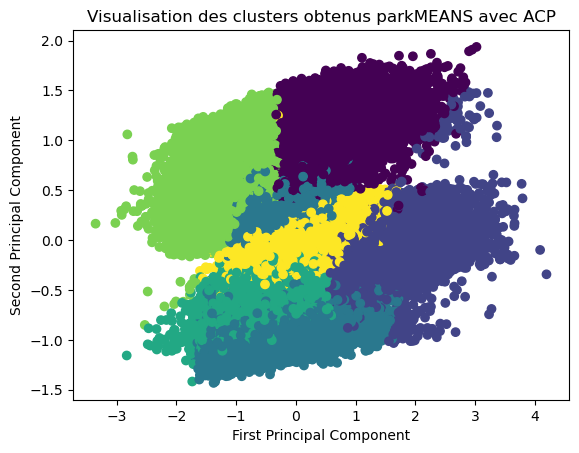

array([0, 4, 3, ..., 3, 5, 3], dtype=int32)

In [292]:

kmeans = KMeans( n_clusters = 6, n_init=1)
predict =kmeans.fit_predict(X_pca)
X_pca["cluster"] = predict 
plt.scatter(X_pca["0"], X_pca["1"], c=X_pca["cluster"])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.title('Visualisation des clusters obtenus parkMEANS avec ACP')
plt.show()
predict

In [293]:
grouped_df["cluster"]= predict

In [294]:
grouped_df

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase,cluster
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,delivered,1.0,141.90,credit_card,8.0,5.0,other,True,True,1,160,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,delivered,1.0,27.19,credit_card,1.0,4.0,health_beauty,True,True,1,163,4
0000f46a3911fa3c0805444483337064,1,delivered,1.0,86.22,credit_card,8.0,3.0,office,False,True,1,586,3
0000f6ccb0745a6a4b88665a16c9f078,1,delivered,1.0,43.62,credit_card,4.0,4.0,electronics,False,True,1,370,3
0004aac84e0df4da2b147fca70cf8255,1,delivered,1.0,196.89,credit_card,6.0,5.0,electronics,True,True,1,337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,delivered,1.0,2067.42,credit_card,10.0,5.0,health_beauty,False,True,4,496,1
fffea47cd6d3cc0a88bd621562a9d061,1,delivered,1.0,84.58,credit_card,1.0,4.0,baby,False,True,1,311,3
ffff371b4d645b6ecea244b27531430a,1,delivered,1.0,112.46,credit_card,1.0,5.0,auto,False,True,1,617,3


In [295]:
agg_dict = {}

for col in grouped_df.columns:
    if grouped_df[col].dtype == 'object' or grouped_df[col].dtype == 'bool':
        agg_dict[col] = lambda x: x.value_counts().index[0]
    elif grouped_df[col].dtype == 'float64' or grouped_df[col].dtype == 'int64':
        agg_dict[col] = 'mean'

df_cluster = grouped_df.groupby(by='cluster').agg(agg_dict)

In [296]:
agg_dict

{'frequency': 'mean',
 'order_status': <function __main__.<lambda>(x)>,
 'payment_sequential': 'mean',
 'payment_value': 'mean',
 'payment_type': <function __main__.<lambda>(x)>,
 'payment_installments': 'mean',
 'review_score': 'mean',
 'product_category_name': <function __main__.<lambda>(x)>,
 'same_region': <function __main__.<lambda>(x)>,
 'on_time_delivery': <function __main__.<lambda>(x)>,
 'total_object': 'mean',
 'last_purchase': 'mean'}

In [297]:
df_cluster

,frequency,order_status,payment_sequential,payment_value,payment_type,payment_installments,review_score,product_category_name,same_region,on_time_delivery,total_object,last_purchase
cluster,,,,,,,,,,,,
0,1.039665,delivered,1.006717,216.556724,credit_card,4.492266,4.211478,other,True,True,2.568837,276.656007
1,1.040860,delivered,1.006855,353.502580,credit_card,5.998082,3.930672,other,False,True,2.694626,327.769177
2,1.039191,delivered,1.004869,145.744441,boleto,1.006742,4.121498,other,False,True,2.110012,302.216937
3,1.031358,delivered,1.049762,76.756023,credit_card,2.176542,4.085831,electronics,False,True,2.394881,360.421329
4,1.024437,delivered,1.039867,53.334861,credit_card,1.470785,4.324067,electronics,True,True,1.981672,264.910598
5,1.037146,delivered,1.017323,128.050239,credit_card,2.757139,4.307193,other,False,True,1.701100,121.382544


<!-- - cluster 0 : customer state, ancien client
- cluster 1 : payement installments , payement value,  client assez recent 
- cluster 2:  review score 
- cluster 3:  payement value faible, same region 
- cluster 4:  frequency, total object 
- cluster 5: last purchase 
- cluster 6: payement sequential, voucher, payement value, total object  -->

In [299]:
columns_numeric =  list(df_cluster.select_dtypes(include=['int', 'float']).columns)

In [300]:
df_num_cluster = df_cluster[columns_numeric]

In [301]:
df_num_cluster

,frequency,payment_sequential,payment_value,payment_installments,review_score,total_object,last_purchase
cluster,,,,,,,
0,1.039665,1.006717,216.556724,4.492266,4.211478,2.568837,276.656007
1,1.040860,1.006855,353.502580,5.998082,3.930672,2.694626,327.769177
2,1.039191,1.004869,145.744441,1.006742,4.121498,2.110012,302.216937
3,1.031358,1.049762,76.756023,2.176542,4.085831,2.394881,360.421329
4,1.024437,1.039867,53.334861,1.470785,4.324067,1.981672,264.910598
5,1.037146,1.017323,128.050239,2.757139,4.307193,1.701100,121.382544


In [ ]:
df_norm = (df_num_cluster - df_num_cluster.min()) / (df_num_cluster.max() - df_num_cluster.min()) * 5

In [ ]:
import plotly.graph_objects as go
# Créer une figure en radar pour chaque cluster
fig = go.Figure()

for cluster, row in df_norm.iterrows():
    values = row.values.tolist()
    

    

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta= columns_numeric,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

# Mettre en forme la figurenum_cols,
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        ),
    ),
    showlegend=True,
    width=780,
    height=780

)

# Afficher la figure
fig.show()
figsize = (60,60)

In [ ]:
# Fit et prédiction sur les données
y_pred = kmeans.fit_predict(df_transformed)

# Vraies étiquettes des classes
y_true = grouped_df['cluster'] # df est le dataframe de l'ensemble de données et cluster_label est la colonne des vraies étiquettes des classes

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# y_true : les vraies étiquettes des classes
# y_pred : les étiquettes prédites des classes
ari = adjusted_rand_score(y_true, y_pred)

print("Adjusted Rand Index :", ari)


Adjusted Rand Index : 0.4498089000892339


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Diviser les données en plusieurs périodes temporelles
periods = [(2016, 1, 2016, 12), (2017, 1, 2017, 12), (2018, 1, 2018, 8)]

for i in range(1, len(periods)):
    # Sélectionner les données pour les périodes i et i-1
    data_i = data[(data.order_purchase_year == periods[i][0]) & (data.order_purchase_month >= periods[i][1]) & (data.order_purchase_year == periods[i][2]) & (data.order_purchase_month <= periods[i][3])]
    data_i_1 = data[(data.order_purchase_year == periods[i-1][0]) & (data.order_purchase_month >= periods[i-1][1]) & (data.order_purchase_year == periods[i-1][2]) & (data.order_purchase_month <= periods[i-1][3])]
    
    # Effectuer le clustering pour les deux périodes
    cluster_i = KMeans(n_clusters=4, random_state=0).fit(data_i)
    cluster_i_1 = KMeans(n_clusters=4, random_state=0).fit(data_i_1)
    
    # Obtenir les labels prédits pour chaque période
    y_pred_i = cluster_i.labels_
    y_pred_i_1 = cluster_i_1.labels_
    
    # Calculer l'ARI entre les deux périodes
    ari = adjusted_rand_score(y_pred_i, y_pred_i_1)
    print("ARI entre périodes {} et {}: {}".format(i-1, i, ari))


NameError: name 'data' is not defined